## Исследование данных о российском кинопрокате



 ### Оценка финансовой состоятельности кинофильмов, получивших прокатное удостоверение на территории РФ, и экономической обоснованности финансирования кинопродукции и гос. бюджета. 

###  Цель и и задачи исследований
  Задачей исследования является выявление основных закономерностей в предоставленных данных, связанных с различными переменными факторами кинопроката: тип кинопродукции, возрастной ценз, объем гос. финансирования, бюжет картин, доля возвратных и невозвратных средств, выделенных на кинопроизводство. Целью исследований данных является выявление зрительских предпочтений на основании рейтинга прокатываемых кинокартин и выдача рекомендаций по целесообразности гос. финансирования производства фильмов в зависимости от их жанра и итогового рейтинга.

### Этапы выполнения работы

- провести первичную оценку "сырых" данных, выявить основные проблемные места (неадекватные
значения данных, неверные названия столбцов, ошибки в названиях нас пунктов, наличие дубликатов 
и пропусков в столбцах). Провести коррекцию данных, устранитть дубликаты и по возможности
заполнить пропуски.
- проверить соответствие типов данных и их физического смысла, при необходимости скорректировать тип
данных. 
- выявить взаимную зависимость основных данных (фактических и временных), влияющих на рейтинг
кинофильмов. Создать новые столбцы с информацией об интегральной финансовой эффективности кинокартин,
учитывающей жанр, возрастные ограничения и зрительский рейтинг. 
- определить четкие критерии финансовой состоятельности кинокартины на основании соотношения 
вложенных и возвратных средств, общего бюджета фильма и его рейтинга.
- выявить рейтинговую динамику кинокартин, учитывающую временной фактор релиза, тип и жанр картины,
страну-производителя, имя режиссера и продюсера.
    Сделать итоговый вывод об особенностях рейтинговых предпочтений зрительской аудитории и
оптимальной стратегии финансирования производства кинокартин, учитывающей жанр фильма, его тип и 
зрительский рейтинг.
   Название столбцов исходной таблицы с данными:
    'title' — название фильма;
    'puNumber' — номер прокатного удостоверения;
    'show_start_date' — дата премьеры фильма;
    'type' — тип фильма;
    'film_studio' — студия-производитель;
    'production_country' — страна-производитель;
    'director' — режиссёр;
    'producer' — продюсер;
    'age_restriction' — возрастная категория;
    'refundable_support' — объём возвратных средств государственной поддержки;
    'nonrefundable_support' — объём невозвратных средств государственной поддержки;
    'financing_source' — источник государственного финансирования;
    'budget' — общий бюджет фильма;
    'ratings' — рейтинг фильма на КиноПоиске;
    'genres' — жанр фильма.

   Источники данных размещены на яндекс-диске:
  1) mkrf_movies.csv (https://disk.yandex.ru/d/GsbBVXliv4eM1g)  
  2) mkrf_shows.csv (https://disk.yandex.ru/d/8DS_Mmr78Rng8Q)

### Объединие данных в один датафрейм. 

In [183]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests
from urllib.parse import urlencode 

In [186]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/GsbBVXliv4eM1g' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
mkrf_movies = pd.read_csv(download_url)
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [187]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/8DS_Mmr78Rng8Q' 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 
mkrf_movies1 = pd.read_csv(download_url)
mkrf_movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [188]:
mkrf_movies1[:3]

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4


In [10]:
#mkrf_movies['puNumber'] = mkrf_movies['puNumber'].fillna(0)
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int', errors = 'ignore')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [11]:
mkrf_movies = mkrf_movies.merge(mkrf_movies1, on = 'puNumber', how = 'outer')

In [7]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<div class="alert alert-info"> 
  Для объединения таблиц выбран метод merge(), объединяющий таблицы по общему столбцу "puNumber". 
В таблице 'mkrf_movies' тип значений в данном столбце был 'object', а в табл. 'mkrf_movies' - 'int64'.
Для преобразования столбца в 'mkrf_movies' в 'int64' сначала заполнили в нем пропуски, а потом 
методом 'to_numeric()' перевели нечисловые данные в NaN, после чего методои astype() перевели 
числовые данные в 'int64'. Это позволило объединить таблицы методом merge(outer).    
</b>

<div class="alert alert-info"> 
   Тип данных в столбце 'puNumber' был последовательно преобразован
из 'object' в 'float64', а затем в 'int64' (в соответствии с типом данных в одноименном
столбце 'puNumber' в другой таблице mkrf_movies1). При этом, количество значений в столбце 'puNumber'
снизилось на 1 (с 7486 до 7485). После объединения таблиц изменения в количествах 
данных (метод info()) в столбцах не обнаружено. 
</b>

### Предобработка данных

#### Проверка типа данных

- Проверка типов данных в датафрейме и их преобразование

In [13]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [14]:
mkrf_movies['show_start_date'] = pd.to_datetime(mkrf_movies['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')

In [15]:
mkrf_movies['ratings'] = pd.to_numeric(mkrf_movies['ratings'], errors = 'coerce')

In [16]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7485 non-null   float64            
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

<div class="alert alert-info"> 
   Были исправлены типы данных в след столбцах: 'puNumber' (object на int64),'show_start_date'
(object на datetime64), 'ratings' (object на float64).    
</b>

#### Изучение пропусков в датафрейме

In [17]:
mkrf_movies.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [18]:
mkrf_movies['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [19]:
mkrf_movies['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [20]:
mkrf_movies.loc[mkrf_movies['production_country'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216.0,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410.0,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [21]:
mkrf_movies.loc[mkrf_movies['puNumber'] == 111001216, 'production_country'] = 'Россия'

In [22]:
mkrf_movies.loc[mkrf_movies['director'].isna(), 'director'] = mkrf_movies.loc[mkrf_movies['director'].isna(),
               'producer']

In [23]:
mkrf_movies.loc[mkrf_movies['producer'].isna(), 'producer'] = mkrf_movies.loc[mkrf_movies['producer'].isna(),
                'director']

In [24]:
mkrf_movies.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          1
director                    4
producer                    4
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [25]:
mkrf_movies.query('production_country == "Россия"')['refundable_support'].count()

316

In [26]:
mkrf_movies.query('"Россия" in production_country').isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                16
production_country          0
director                    3
producer                    3
age_restriction             0
refundable_support       1506
nonrefundable_support    1506
budget                   1506
financing_source         1506
ratings                   542
genres                    530
box_office               1043
dtype: int64

<div class="alert alert-info"> 
 При изучении пропусков данных были проведены след замены:
    - пропуски в 'film_studio' и 'production_country' были соотнесены между собой и один из пропусков
    был заменен на страну (Россия), которой принадлежит данная студия. 
    - были соотнесены данные столбцов 'director' и 'producer' и проведены взаимные замены: пропуски
    в 'director' заменили соответствующим значением в столбце 'producer' и наоборот. Это сделано 
    потому, что директор (режиссер) часто выступает в роли продюсера и наоборот, поэтому такая
    замена уместна.
    - пропуски в данных о финансировании в столбцах 'refundable_support', 'nonrefundable_support', 
    'budget', 'financing_source' скорее всего связаны с фильмами зарубежного или совместного 
    производства (или российского производства без гос финансирования), так как количество этих 
    пропусков одинаково во всех этих столбцах (7154). Срез по содержанию слова 'Россия' в данных
    столбца 'production_country' показывает, что из 1822 картин финансировалось 316 шт, а оставшиеся
    1506 не финансировались (это пропуски в 'refundable_support'). 
    - пропуски в столбцах 'ratings' и 'genres' характерны, как для российских, так и для зарубежных
    картин, причем в доли этих пропусков для картин с участием России и без нее примерно равны.  
    - пропуски в столбце 'box_office' для картин производства с российским участием составляют 
    примерно 25 % от общего числа.  
</b>

####  Изучение дубликатов в датафрейме

In [27]:
mkrf_movies.duplicated().sum()

0

In [28]:
len(mkrf_movies['title'].unique())

6772

In [29]:
mkrf_movies['title'].str.lower()

0                                   открытый простор
1                               особо важное задание
2                                       особо опасен
3                                       особо опасен
4                                       особо опасен
                            ...                     
7481       сад художника: американский импрессионизм
7482                                 звериная ярость
7483       щенячий патруль: скорей спешим на помощь!
7484        машины песенки. серия "испанские мотивы"
7485    машины песенки. серия "когда цветут кактусы"
Name: title, Length: 7486, dtype: object

In [30]:
mkrf_movies['title'] = mkrf_movies['title'].str.lower()

In [31]:
len(mkrf_movies['title'].unique())

6762

In [32]:
len(set(list(mkrf_movies['title'])))

6762

In [33]:
len(mkrf_movies['puNumber'].unique())

7484

In [34]:
mkrf_movies.pivot_table(index = 'title', values = 'puNumber', 
                        aggfunc='count').sort_values(by = 'puNumber', ascending=False)


,puNumber
title,
день святого валентина_,5
не брать живым /по книге раджива чандрасекарана/,4
непокоренный.,4
жена путешественника во времени,4
дорога /по новелле кормака мккарфи/,4
...,...
история золушки,1
история дельфина,1
историки об истории или слово о поле куликовом,1


In [35]:
e = mkrf_movies.pivot_table(index = 'title', values = 
                            'puNumber', aggfunc='count').sort_values(by = 'puNumber',
                            ascending=False)
e['puNumber'].sum() - len(e['puNumber'])

723

In [36]:
mkrf_moviesN = mkrf_movies.drop(columns='puNumber')

In [37]:
mkrf_moviesN.duplicated().sum()

5

In [38]:
mkrf_new = mkrf_movies.copy()
mkrf_new = mkrf_new.drop_duplicates(subset=['title'], ignore_index = True)
mkrf_new.pivot_table(index = 'title', values = 'puNumber', 
                     aggfunc = 'count').sort_values(by ='puNumber', ascending = False)[:5]

,puNumber
title,
я препод,1
плюс один.,1
побег из джунглей,1
побег из вегаса,1
побег за мечтой,1


In [39]:
mkrf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6762 entries, 0 to 6761
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6762 non-null   object             
 1   puNumber               6761 non-null   float64            
 2   show_start_date        6762 non-null   datetime64[ns, UTC]
 3   type                   6762 non-null   object             
 4   film_studio            6745 non-null   object             
 5   production_country     6761 non-null   object             
 6   director               6758 non-null   object             
 7   producer               6758 non-null   object             
 8   age_restriction        6762 non-null   object             
 9   refundable_support     329 non-null    float64            
 10  nonrefundable_support  329 non-null    float64            
 11  budget                 329 non-null    float64          

In [40]:
f = []
d = ['budget', 'refundable_support', 'nonrefundable_support', 'ratings', 'box_office']
for i in d:
    f.append(mkrf_movies[i].sum())
f

[42240265939.0, 3939000000.0, 16261688312.0, 42050.3, 241519722477.13]

In [41]:
f1 = []
d = ['budget', 'refundable_support', 'nonrefundable_support', 'ratings', 'box_office']
for i in d:
    f1.append(mkrf_new[i].sum())
f1

[41173265939.0, 3834000000.0, 15811688312.0, 37256.2, 228024278520.67]

 <div class="alert alert-info"> 
    Явных дубликатов в DF не обнаружено. Для поиска неявных дубликатов названия в столбце 'title' 
    были приведены к нижнему регистру, при этом количество уникальных названий снизилось на 10
    (с 6772 до 6762). Так как одному значению в столбце 'puNumber' соответствуют несколько значений в
    столбце 'title' была построена сводная таблица по инждексу 'title'. Число уникальных названий
    фильмов составляет 6762, количество дубликатов, соответственно, равно 706. В DF нет дугих явных 
    признаков конкретного фильма, кроме названия, поэтому нельзя однозначно исключать дубликаты с
    одним названием (но с разными номерами puNumber), так как эти дубликаты могут отличаться 
    численными характеристикмми (сборами, рейтингом и пр.). При удалении столбца 'puNumber' было
    обнаружено только 5 полных дубликатов, то есть релизы одного и того же фильма преподносятся со 
    всеми атрибутами отдельного фильма со своими датами релиза, рейтингом и пр. Также, при
    определении сумм числовых параметров столбцов исходной и отфильтрованной таблиц было обнаружено
    несоответстве в суммарных данных, что говорит о том, что при удалении дубликатов были удалены 
    некоторые численные характеристики отдельных релизов. Кроме того, нельзя исключать маловероятную 
    возможность, что в DF есть совершенно разные фильмы, имеющие одинаковое название. Поэтому, 
    в дальнейшем, для сравнения данных необходимо дополнительно пользоваться таблицей mkrf_new,
    которую получили после удаления дубликатов строк по столбцу 'title'.   
</b>

#### Изучение категориальных значений

In [42]:
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [43]:
len(mkrf_movies['type'].unique())

8

In [44]:
len(mkrf_movies['type'].str.strip().unique())

6

In [45]:
mkrf_movies['type'] = mkrf_movies['type'].str.strip()

In [46]:
mkrf_movies['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [47]:
len(mkrf_movies['production_country'].unique())

951

In [48]:
len(mkrf_movies['production_country'].str.strip().unique())

935

In [49]:
mkrf_movies['production_country'] = mkrf_movies['production_country'].str.strip()

In [50]:
len(mkrf_movies['film_studio'].unique())

5491

In [51]:
r = ['film_studio', 'age_restriction', 'director', 'producer', 'genres', 'financing_source']
for i in r:
    mkrf_movies[i] = mkrf_movies[i].str.strip()

In [52]:
len(mkrf_movies['film_studio'].unique())

5463

<div class="alert alert-info"> 
 Ряд значений в столбцах категориальных переменных имеют лишние пробелы в ковычках, поэтому эти 
    пробелы были удаоены методом strip(), что снизило количество уникальных значений в столбцах. 
</b>

#### Проверка количественных значений

In [53]:
mkrf_movies['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

In [54]:
mkrf_movies['nonrefundable_support'].unique()[:5]

array([           nan, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07])

In [55]:
mkrf_movies['budget'].unique()[:5]

array([          nan, 7.9411900e+07, 3.7142857e+07, 1.7602349e+08,
       4.0574140e+07])

In [56]:
mkrf_movies['refundable_support'].unique()[:5]

array([      nan,        0., 50000000., 26000000., 30000000.])

In [57]:
mkrf_movies['ratings'].unique()[:5]

array([7.2, 6.6, 6.8, 7.7, 8.3])

In [58]:
mkrf_movies.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          1
director                    4
producer                    4
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [59]:
len(mkrf_movies.loc[(mkrf_movies['refundable_support'] + 
                     mkrf_movies['nonrefundable_support']) == mkrf_movies['budget']])

0

In [60]:
len(mkrf_movies.loc[(mkrf_movies['refundable_support'] 
                     + mkrf_movies['nonrefundable_support']) > mkrf_movies['budget']])

17

In [61]:
len(mkrf_movies.loc[(mkrf_movies['refundable_support'] 
                     + mkrf_movies['nonrefundable_support']) < mkrf_movies['budget']])

315

In [62]:
mkrf_movies.loc[(mkrf_movies['refundable_support'] 
                 + mkrf_movies['nonrefundable_support']) > mkrf_movies['budget'], 'refundable_support'].mean()

16705882.352941176

In [63]:
mkrf_movies.loc[(mkrf_movies['refundable_support'] + mkrf_movies['nonrefundable_support']) > mkrf_movies['budget'], 'budget'].mean()

0.0

In [64]:
mkrf_movies.loc[(mkrf_movies['refundable_support'] 
                 + mkrf_movies['nonrefundable_support']) < mkrf_movies['budget'], 'budget'].mean()

134096082.34603174

In [65]:
mkrf_movies.loc[(mkrf_movies['refundable_support'] 
                 + mkrf_movies['nonrefundable_support']) < mkrf_movies['budget'], 
                'refundable_support'].sort_values().unique()[:5]

array([      0., 3500000., 5000000., 7000000., 7153119.])

In [66]:
mkrf_movies.loc[(mkrf_movies['refundable_support'] 
                 + mkrf_movies['nonrefundable_support']) < mkrf_movies['budget'],
                'nonrefundable_support'].sort_values().unique()[:5]

array([      0., 3000000., 4700000., 5000000., 5300000.])

In [67]:
mkrf_movies.loc[(mkrf_movies['refundable_support'] + 
                 mkrf_movies['nonrefundable_support']) > mkrf_movies['budget'],
                'budget'] = mkrf_movies['refundable_support'] + mkrf_movies['nonrefundable_support']  

In [68]:
len(mkrf_movies.loc[(mkrf_movies['refundable_support'] + 
                     mkrf_movies['nonrefundable_support']) > mkrf_movies['budget']])

0

<div class="alert alert-info"> 
 Несоответствие в числовых столбцах 'refundable_support', 'nonrefundable_support' и 'budget' связано 
    с тем, что ни в одной из строк нет равенства между суммой возвратных и невозвратных средств и
    величиной бюджета. При этом, в 17 случаях бюджет был меньше суммы возвр и невозвр средств - 
    величина бюджета была равна 0. Поэтому в этих 17 случаях величина бюджета (0) была заменена 
    на сумму возвр и невозвр средств. В остальных 315 случаях бюджет был больше суммы возвр и 
    невозвр средств. При этом, в 222 случаях это связано с тем, что в колонке возвр или колонке 
    невозвр средств стояли нулевые значения.           
</b>

#### Добавление новых столбцов

- Создание столбца с информацией о годе проката. Выделение года из даты премьеры фильма.

In [69]:
mkrf_movies['start_year'] = pd.DatetimeIndex(mkrf_movies['show_start_date']).year
mkrf_movies['start_year'][:5]

0    2015
1    2016
2    2016
3    2016
4    2015
Name: start_year, dtype: int64

- Создание 2 столбцов: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [70]:
def first_value(w):
    s = str(w)
    r = s.split(',')
    return r[0]
mkrf_movies['director_main'] = mkrf_movies['director'].apply(first_value)
mkrf_movies['genre'] = mkrf_movies['genres'].apply(first_value)
mkrf_movies[:1]   

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,start_year,director_main,genre
0,открытый простор,221048915.0,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик


- Расчет доли от общего бюджета фильма, которая приходится на государственную поддержку.

In [71]:
mkrf_movies['fund_ratio'] = (mkrf_movies['refundable_support'] +
                             mkrf_movies['nonrefundable_support'])*100/mkrf_movies['budget']
mkrf_movies['fund_ratio'].describe()

count    332.000000
mean      54.209799
std       19.692515
min        4.404305
25%       38.461538
50%       61.403763
75%       66.141160
max      100.000000
Name: fund_ratio, dtype: float64

<div class="alert alert-info"> 
 В отдельные столбцы были выделены год релиза фильма, главный режиссер и основной жанр. В отдельном
    столбце 'fund_ratio' посчитана доля гос финансирования российских фильмов - средняя величина доли 
    финансовой поддержки (54,2 %) близка к медианной (61,5 %), поддержка может доходить до 100 %. 
    В целом, при небольшой величине станд отклонения, в DF отсутствуют нетипичные значения 
    (отклонения не првышают +-1,5 IQR), что говорит о более-менее единой политике в гос 
    финансировании, которое в большинстве случаев составлянет около 50 % бюджета картин. 
</b>

### Исследовательский анализ данных


- Оценка количества фильмов, выходящих в прокат каждый год. 

In [72]:
mkrf_movies['start_year'].unique()

array([2015, 2016, 2013, 2014, 2012, 2017, 2010, 2011, 2018, 2019],
      dtype=int64)

In [73]:
mkrf_movies.groupby('start_year')['puNumber'].count().sort_values(ascending = False)

start_year
2010    985
2019    930
2018    891
2016    818
2014    806
2015    705
2013    630
2011    622
2012    593
2017    505
Name: puNumber, dtype: int64

In [74]:
mkrf_unknown = mkrf_movies.loc[mkrf_movies['start_year'].isna()]
mkrf_unknown['start_year'].count()

0

In [75]:
mkrf_movies['box_office'].isna().sum()

4328

In [76]:
allotment = (mkrf_movies['puNumber'].count() -
             mkrf_movies['box_office'].isna().sum())*100/mkrf_movies['puNumber'].count()
allotment

42.17768871075484

In [77]:
mkrf_new = mkrf_movies.copy()
mkrf_new = mkrf_new.drop_duplicates(subset=['title'], ignore_index = True)
mkrf_new.groupby('start_year')['puNumber'].count().sort_values(ascending = False)

start_year
2019    890
2018    871
2016    771
2010    760
2014    729
2015    661
2013    590
2012    517
2017    498
2011    474
Name: puNumber, dtype: int64

In [78]:
allotment_n = (mkrf_new['puNumber'].count() - 
               mkrf_new['box_office'].isna().sum())*100/mkrf_new['puNumber'].count()
allotment_n

44.53483212542523

<div class="alert alert-info"> 
  В качестве свидетельства факта проката картины в кинотеатре были выбраны значения кассы фильмов, 
    приведенные в столбце 'box_office'. В таблице релизов (mkfr_movies) в столбце 'box_office' 4328
    пропусков (релизы, о прокате которых нет сведений). Доля релизов с известной информацией о
    прокате вкинотеатрах составляет 42,2 %. Аналогичный расчет для отфильтрованной таблицы, 
    исключающей дубликаты релизов (mkrf_new), показывает близкую долю релизов с известной информацией
    о прокате - 44,5 %. 
</b>

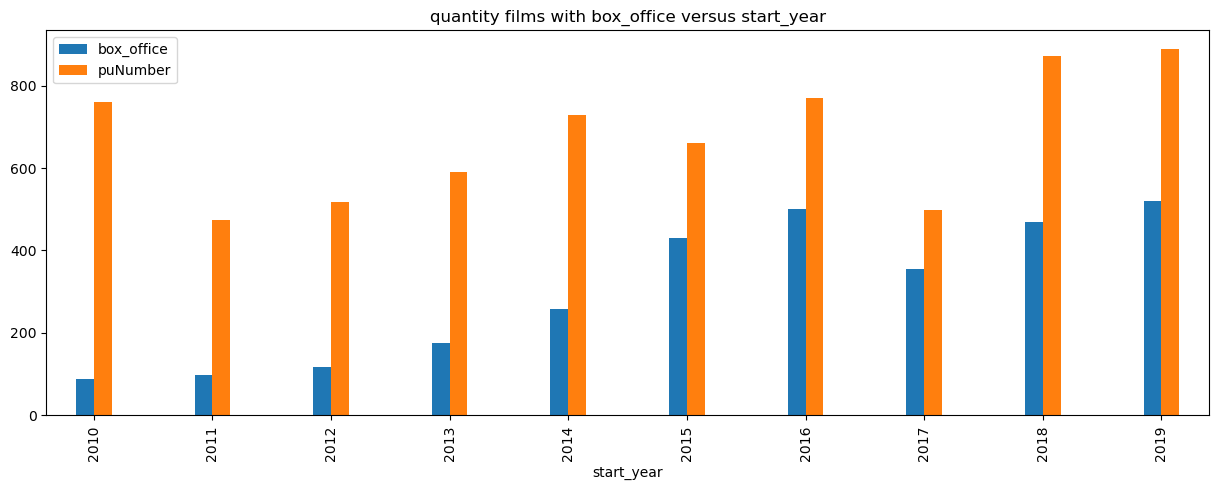

In [79]:
mkrf_s = mkrf_new.pivot_table(index = 'start_year', values = ['box_office',
                                      'puNumber'], aggfunc = 'count')
mkrf_s.plot(kind='bar', width = 0.3, title = 'quantity films with box_office versus start_year',
                                             figsize=(15,5)); 

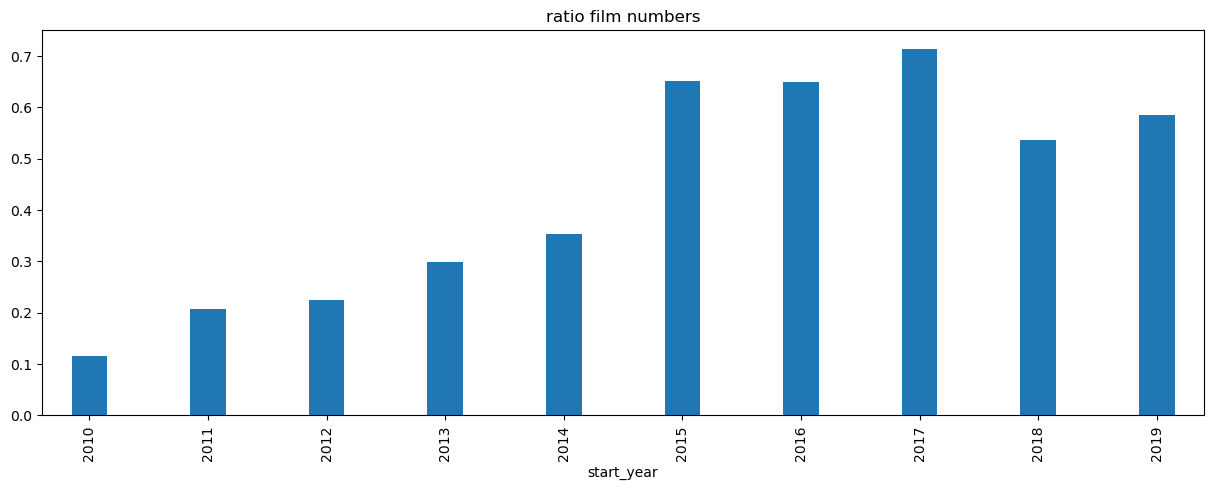

In [80]:
(mkrf_s['box_office']/mkrf_s['puNumber']).plot(kind='bar', width = 0.3, title = 'ratio film numbers',
                                               figsize=(15,5)); 

<div class="alert alert-info"> 
  Построена столбчатая диаграмма зависмости числа фильмов с имющейся информацией о сборах и их общего
количества от времени релиза картин. В период десятилетия соотношение между количеством фильмов с
извесстной кассой и общим числом фильмов, в целом, постепенно увеличивается: с 2010 по 2017 год 
данное соотношение увеличилось от 10 % до 70 %, после снизилось и в 2018 и 2019 гг. составило,
соответственно, 55 и 60 %.   
</b>

<Axes: >

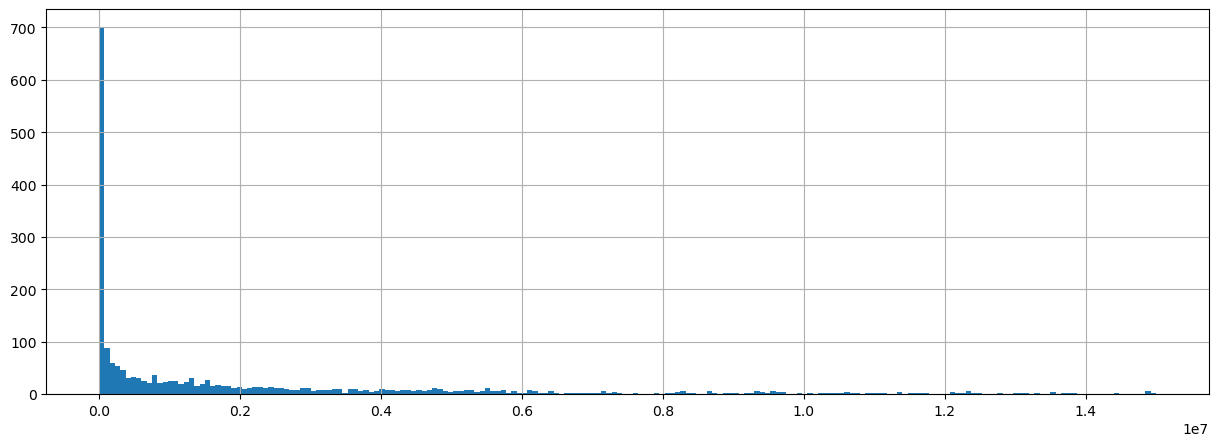

In [81]:
mkrf_new['box_office'].hist(bins = 200, range=(0,15000000), figsize=(15,5))

<Axes: >

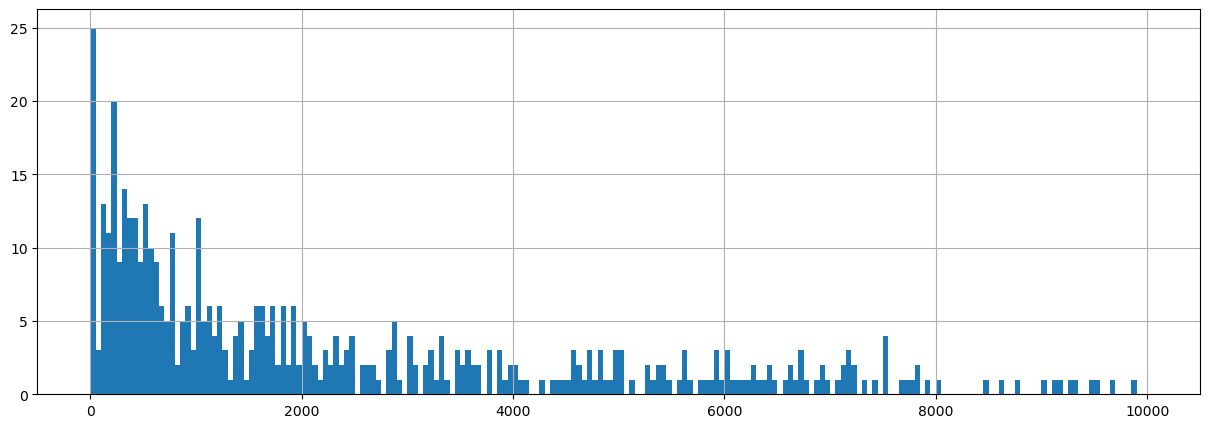

In [82]:
mkrf_new['box_office'].hist(bins = 200, range=(0,10000), figsize=(15,5))

In [83]:
mkrf_movies['box_office'].isna().sum()

4328

In [84]:
mkrf_movies.query('box_office > 0')['box_office'].count()

3134

In [85]:
mkrf_movies.query('box_office == 0')['box_office'].count()

24

In [86]:
mkrf_movies.query('box_office > 0 and box_office < 1000000')['box_office'].count()

1234

In [87]:
mkrf_movies.query('box_office > 0 and box_office < 5000000')['box_office'].count()/mkrf_movies['box_office'].count() 

0.5867637745408486

<div class="alert alert-info"> 
    В столбце 'box_office' отсутствует информация о 4328 релизах (либо не было проката, либо информация
не была занесена в таблицу). Из имеющихся данных 24 релиза имели нулевую кассу, и примерно 30 % релизов
имели кассу менее 1 млн. Были построены гистограммы по значеничям столбца 'box_office' в интервалах значений от 0 до 15 млн 
и от 0 до 10000, которые подтверждают крайне скудные сборы релизов, более 50 % которых не превышают 5 млн. 
</b>

- Изучение изменения динамики проката по годам. 

In [88]:
mkrf_new.pivot_table(index = 'start_year', values = 'box_office', 
                     aggfunc = 'sum').sort_values(by='box_office', ascending = False)


,box_office
start_year,
2017,4.856155e+10
2019,4.840763e+10
2018,4.781385e+10
2016,4.373144e+10
2015,3.208465e+10
2014,7.372599e+09
2013,2.976853e+07
2011,1.394439e+07
2012,6.465111e+06


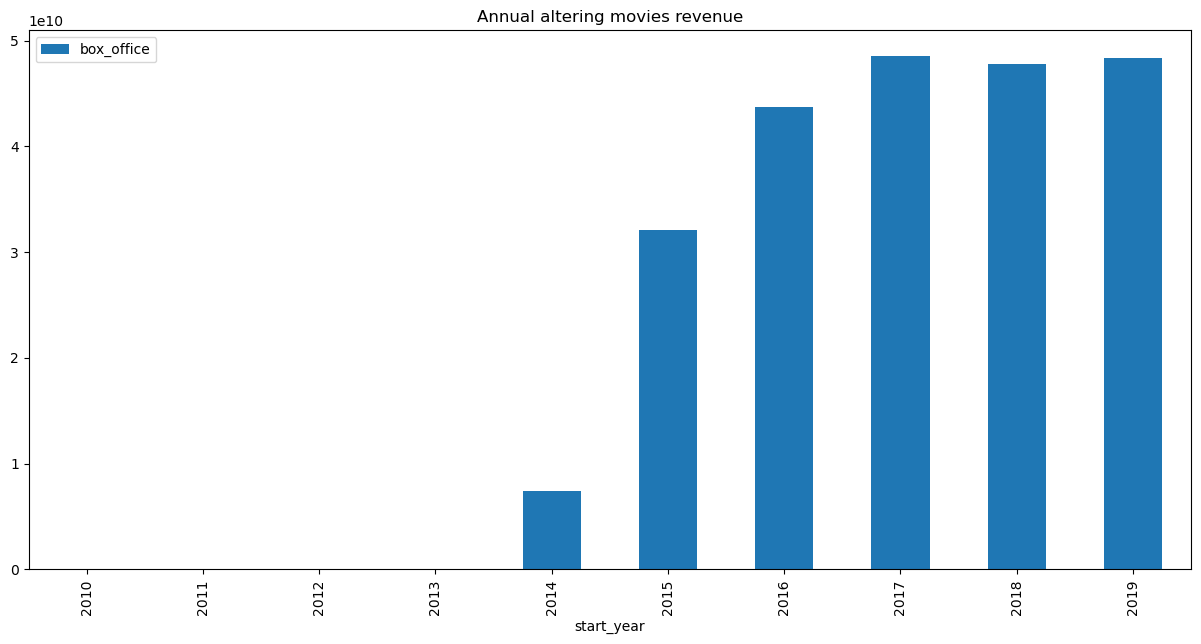

In [89]:
mkrf_new.pivot_table(index = 'start_year', values = 'box_office', 
                     aggfunc = 'sum').plot(kind ='bar', figsize = (15,7), 
                                           xlim = (2014,2019), title = 'Annual altering movies revenue');

In [90]:
allot = []
y = 2010
for i in range(10):
    mkrf_x = mkrf_movies.loc[mkrf_movies['start_year']==y]
    allotment_x = (mkrf_x['puNumber'].count() - 
                   mkrf_x['box_office'].isna().sum())*100/mkrf_x['puNumber'].count()
    allot.append(allotment_x)
    y+=1
allot

[10.65989847715736,
 17.524115755627008,
 21.58516020236088,
 29.206349206349206,
 34.49131513647643,
 65.95744680851064,
 64.30317848410758,
 70.6930693069307,
 53.31088664421998,
 56.98924731182796]

In [91]:
mkrf_xx = mkrf_new.pivot_table(index = 'start_year', values = 'box_office', aggfunc = 'sum')
income = list(mkrf_xx['box_office'])
income

[2374340.0,
 13944390.0,
 6465111.0,
 29768531.2,
 7372598571.6,
 32084649858.37,
 43731444689.34,
 48561554266.51,
 47813851651.54,
 48407627111.11]

In [92]:
quot_corr = np.corrcoef(income, allot)
quot_corr

array([[1.        , 0.91752563],
       [0.91752563, 1.        ]])

In [93]:
mkrf_movies.pivot_table(index = 'start_year', values = 'box_office', 
                        aggfunc = 'sum').sort_values(by='box_office', ascending = False)

,box_office
start_year,
2018,4.966840e+10
2017,4.856371e+10
2019,4.842571e+10
2016,4.786630e+10
2015,3.949737e+10
2014,7.444952e+09
2013,2.979971e+07
2011,1.410276e+07
2012,6.955423e+06


<div class="alert alert-info"> 
 Согласно отфильтрованной таблице выхода фильмов (mkrf_movies) наиибольшие суммарные сборы были 
    в 2017 г. Три года (2017 - 2019) ежегодные собры держались примерно на одном уровне - около 50 
    млрд. Минимальная сумма сборов была в 2010 г - 2,4 млн. В целом за десятилетие ежегодная сумма 
    сборов увеличилась более, чем в 20000 раз. Вероятно фильмы начала и середины днесятилетия 
    содержат меньше всего информации о прокате. Для проверки были рассчитаны ежегодные доли картин
    с известной кассой проката и собраны в список 'allot'. В другой список 'income' были помещены 
    суммарные ежегодные сборы. Оказалось, эти списки коррелируют с коэф. корреляции 0,92, то есть,
    в течение десятилетия рост ежегодных сборов пропорционален росту доли картин с известной 
    информацией о кассе. Иначе говоря, огромная разница в мизерных ежегодных сборах начала 
    десятиления (2010 - 2014 гг) и максимальных сборах в период 2016 - 2019 гг технически связана, 
    помимо прочего, с ростом информации о кассе фильмов. Для исходной таблицы релизов (mkrf_movies) 
    сохраняется аналогичная тенденция, только наиболее кассовый год не 2017, а 2018 со сборами 4,97 
    млрд.             
</b>

- Расчет средней и медианной суммы сборов для каждого года.

In [94]:
mkrf_new.pivot_table(index = 'start_year', values = 'box_office',
                     aggfunc = ['mean', 'median']).sort_values(by = ('mean','box_office'), 
                                                               ascending = False)

,mean,median
,box_office,box_office
start_year,,
2017,1.364089e+08,10177833.50
2018,1.021663e+08,8821498.98
2019,9.291291e+07,4783481.50
2016,8.728831e+07,3640802.30
2015,7.444234e+07,4327265.70
2014,2.868715e+07,22490.00
2013,1.691394e+05,3565.00
2011,1.422897e+05,3042.50


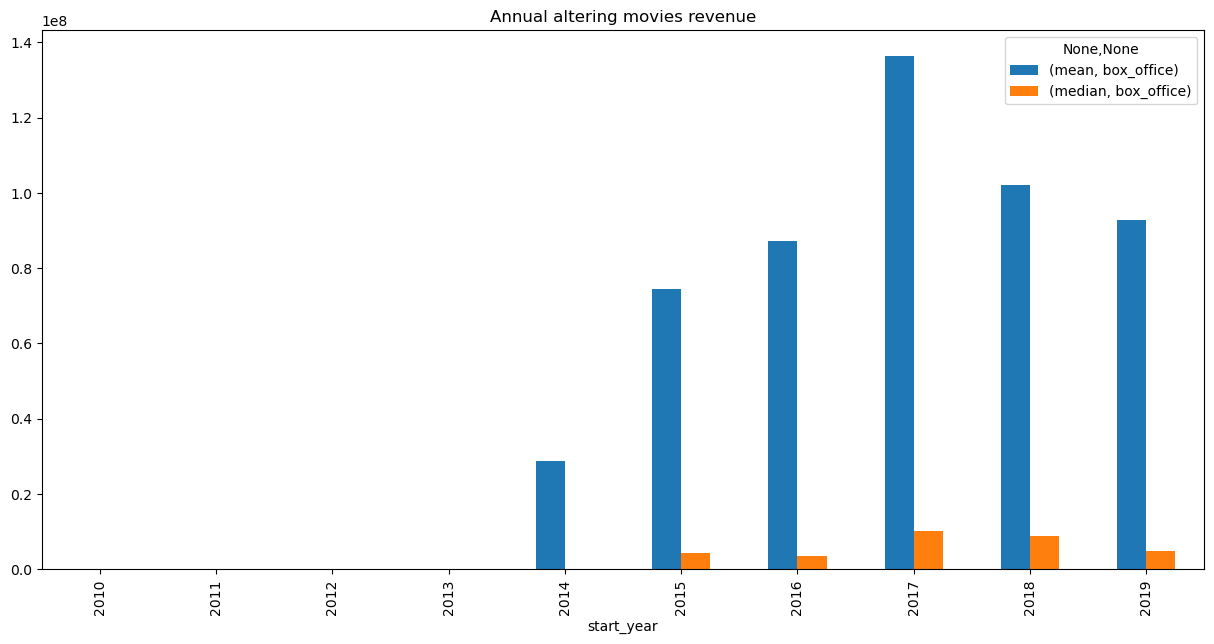

In [95]:
mkrf_new.pivot_table(index = 'start_year', values = 'box_office',
                     aggfunc = ['mean', 'median']).plot(kind ='bar', xlim=(2014,2019), figsize = (15,7), 
                                                        title = 'Annual altering movies revenue');

<div class="alert alert-info"> 
  Средние и медианные значения сборов фильмов, в целом, коррелируют между собой, однако, в 
    большинстве случаев отличаются на порядок. Это говорит об очень большом разборе значений 
    сборов разных картин в течение одного года. Средние (и медианные) сборы росли с 2010 по 2017 г,
    достигли максимума в 2017 г. и снова стали снижаться в период 2017 - 2019 гг. Такой характер 
    зависимости связан вероя0тно с несколькими факторами: низким уровнем информации о сборах фильмов 
        в начале десятилетия (2010 - 2014 гг), что не позволяет набрать для этих лет презентативную 
        выборку соборов; в целом, к середине и концу десятилетия выходит все больше дорогих фильмов,
        которые хорошо выступают в прокате.  
</b>

- Определение влияния возрастных ограничений аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.

In [96]:
mkrf_new.pivot_table(index = 'age_restriction', values = 'box_office', 
                     aggfunc = ['sum', 'median', 'mean',
                                'count']).sort_values(by = ('sum', 'box_office'), ascending = False)

,sum,median,mean,count
,box_office,box_office,box_office,box_office
age_restriction,,,,
«16+» - для детей старше 16 лет,6.948900e+10,1733238.54,6.681635e+07,1040
«12+» - для детей старше 12 лет,6.148595e+10,788647.00,1.157928e+08,531
«6+» - для детей старше 6 лет,5.722449e+10,6217963.00,1.509881e+08,379
«18+» - запрещено для детей,3.874258e+10,5119114.74,4.628743e+07,837
«0+» - для любой зрительской аудитории,1.082250e+09,94515.00,4.810002e+06,225


In [97]:
mkrf_new.pivot_table(index='age_restriction', values = 'ratings', 
                     aggfunc = 'mean').sort_values(by='ratings', ascending = False)

,ratings
age_restriction,
«12+» - для детей старше 12 лет,6.647565
«6+» - для детей старше 6 лет,6.558000
«0+» - для любой зрительской аудитории,6.517327
«16+» - для детей старше 16 лет,6.429442
«18+» - запрещено для детей,6.246682


In [98]:
mkrf_new['age_restriction'].sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [99]:
years = [2015,2016,2017,2018,2019]
d = []
for i in years:
    f = list(mkrf_new.loc[mkrf_new['start_year'] == i].groupby('age_restriction')['box_office'].sum())
    d.append(f)
year_sum = pd.DataFrame(d, columns = mkrf_new['age_restriction'].sort_values().unique(), index = years)
year_sum


,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
2015,2.733678e+08,1.195722e+10,8.274253e+09,3.184098e+09,8.395710e+09
2016,1.501835e+08,1.217834e+10,1.435935e+10,4.990430e+09,1.205314e+10
2017,2.295989e+08,7.851428e+09,1.874289e+10,9.651496e+09,1.208614e+10
2018,3.244900e+07,1.426729e+10,1.481736e+10,8.591773e+09,1.010497e+10
2019,1.774607e+07,1.267655e+10,1.274677e+10,1.011401e+10,1.285255e+10


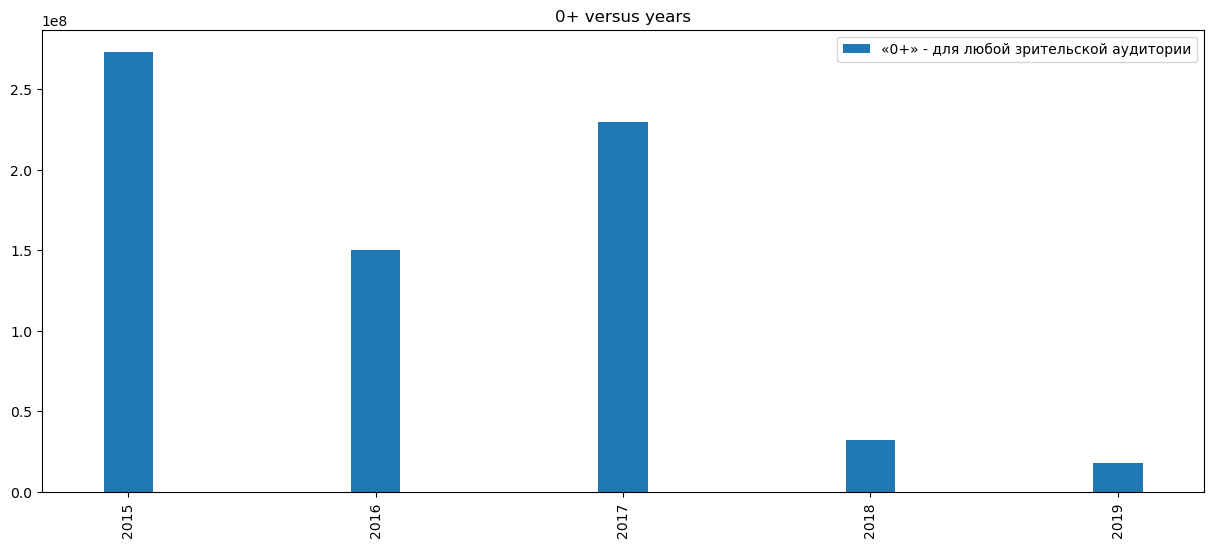

In [100]:
year_sum.plot(kind='bar', y = '«0+» - для любой зрительской аудитории', 
              title = '0+ versus years', width = 0.2, figsize=(15,6));

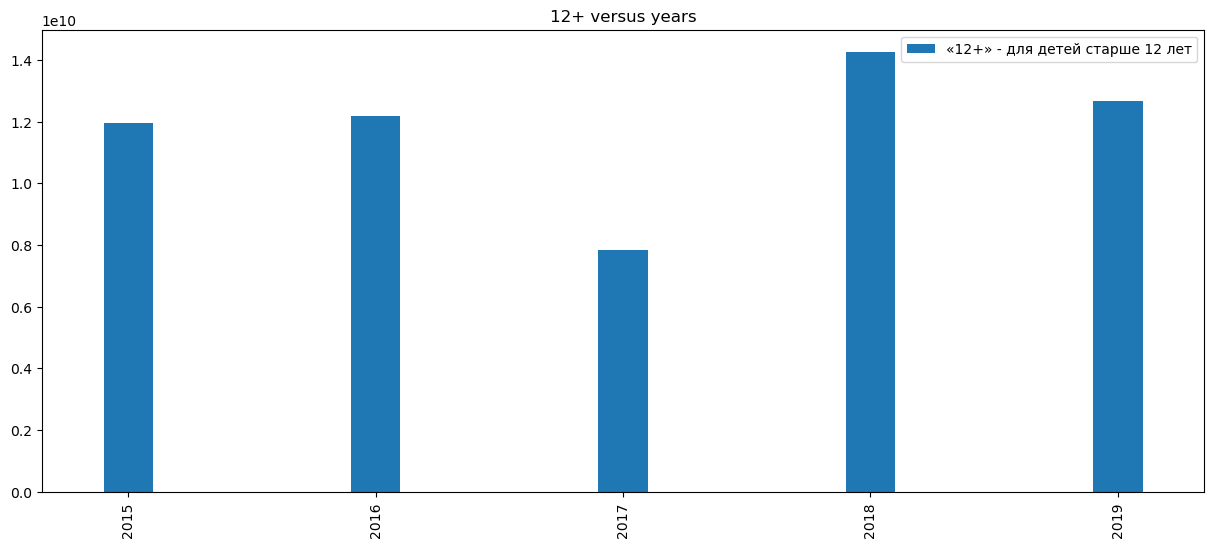

In [101]:
year_sum.plot(kind='bar', y = '«12+» - для детей старше 12 лет',
              title = '12+ versus years', width = 0.2, figsize=(15,6));

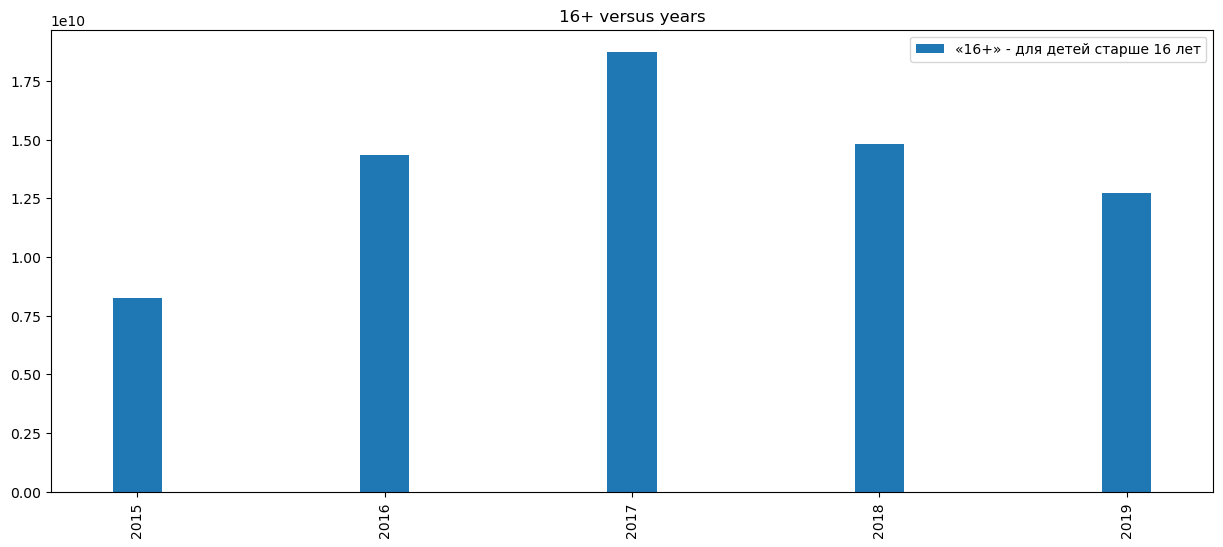

In [102]:
year_sum.plot(kind='bar', y = '«16+» - для детей старше 16 лет', 
              title = '16+ versus years', width = 0.2, figsize=(15,6));

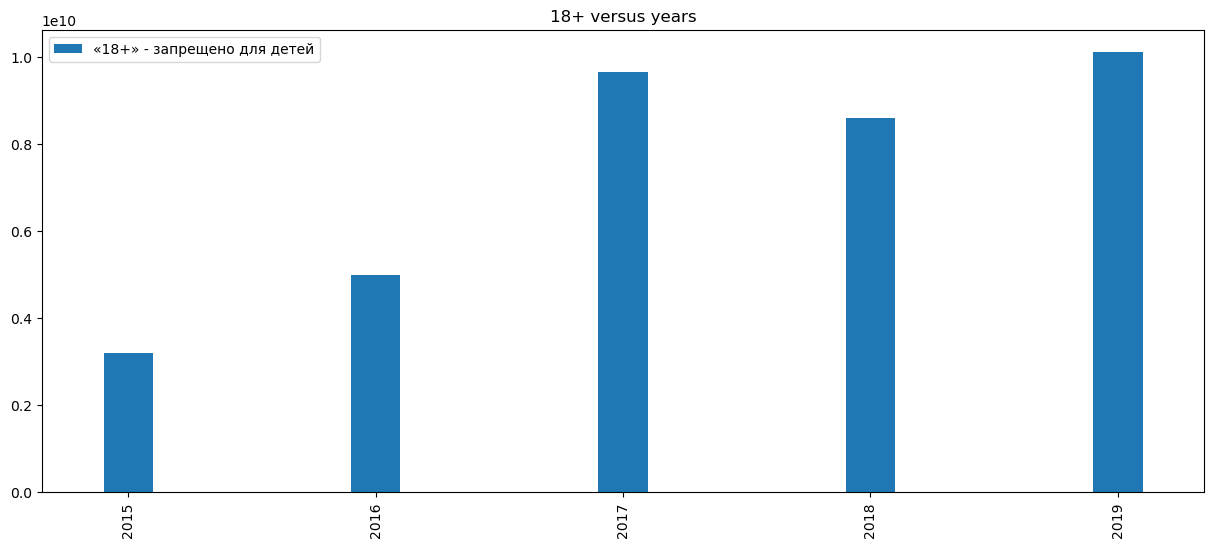

In [103]:
year_sum.plot(kind='bar', y = '«18+» - запрещено для детей', 
              title = '18+ versus years', width = 0.2, figsize=(15,6));

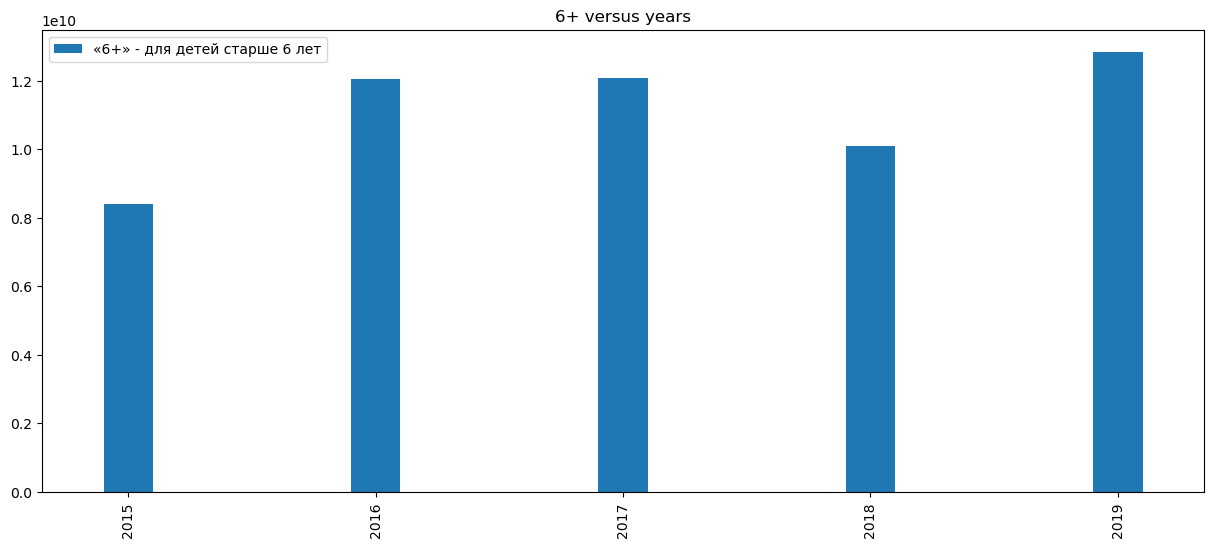

In [104]:
year_sum.plot(kind='bar', y = '«6+» - для детей старше 6 лет',
              title = '6+ versus years', width = 0.2, figsize=(15,6));

In [105]:
year_sum.transpose()

,2015,2016,2017,2018,2019
«0+» - для любой зрительской аудитории,2.733678e+08,1.501835e+08,2.295989e+08,3.244900e+07,1.774607e+07
«12+» - для детей старше 12 лет,1.195722e+10,1.217834e+10,7.851428e+09,1.426729e+10,1.267655e+10
«16+» - для детей старше 16 лет,8.274253e+09,1.435935e+10,1.874289e+10,1.481736e+10,1.274677e+10
«18+» - запрещено для детей,3.184098e+09,4.990430e+09,9.651496e+09,8.591773e+09,1.011401e+10
«6+» - для детей старше 6 лет,8.395710e+09,1.205314e+10,1.208614e+10,1.010497e+10,1.285255e+10


<Axes: title={'center': 'Altering annually sum for different categories'}>

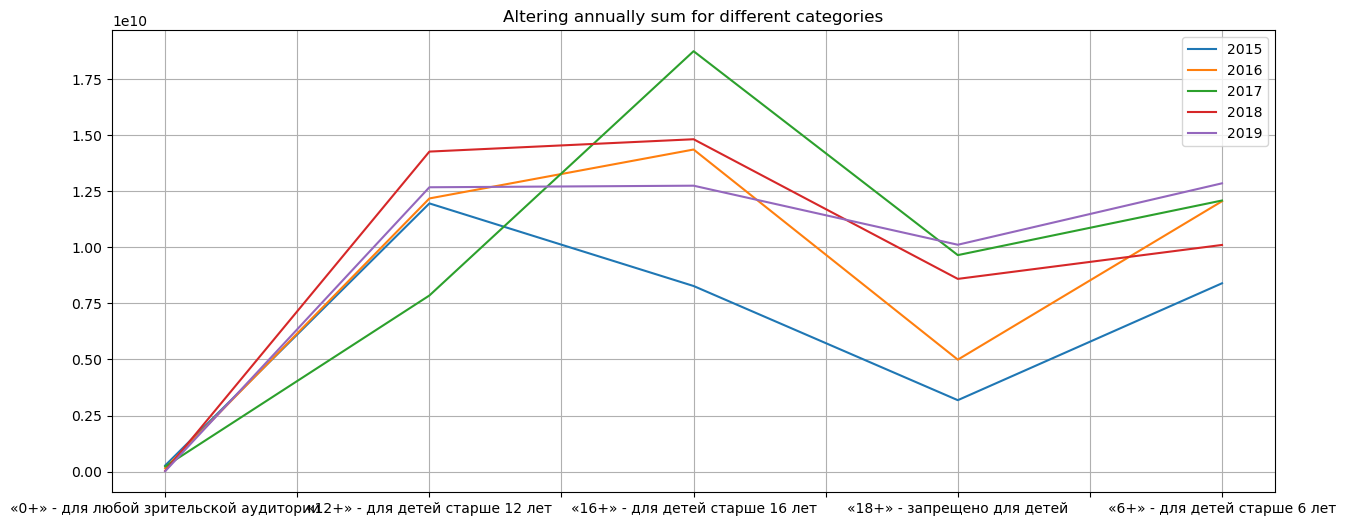

In [106]:
year_sum.transpose().plot(y=[2015,2016,2017,2018,2019], kind='line', grid = True, 
                          title = 'Altering annually sum for different categories', figsize=(15,6))

 <div class="alert alert-info"> 
  Наибольшие сборы за все годы наблюдений у фильмов условно подростковых категорий: категория 
    16+ (69 млрд), затем идет категория 12+ (61 млрд) и замыкает тройку категрия 6+ (57 млрд).
    Cоответственно, в этом ряду уменьшается общее число фильмов от 1040 (16+) до 379 (6+). 
    Самые прибыльные подростковые фильмы  были у категории 6+ (медиана 6,2 млн), а самые низкие
    сборы - у категории 12+ (0,78 млн). Средние рейтинги фильмов для разных категорий близки и 
    лежат в интервале 6,2 - 6,6. Так как лидирующая в сборах категория 16+ имеет предпоследний 
    средний рейтинг (6,4), то разницу в доходах между категориями полулярностью фильмов у зрителей 
    (рейтингом) объяснить нельзя. Лидерство фильмов подростковых категорий объясняется максимальным 
    охватом потенциальных зрителей, они соответствуют большинству жанров. От подростковых фильмов
    отстают фильмы взрослой категории 18+ (39 млрд сборов), не смотря на их относительно высокую
    медианную прибыль (5,1 млн) и больщое количество таких фильмов (837). Доход от взрослых фильмов
    существенно ограничивает отсутствие подростковой аудитории, поэтому они имеют относительно низкую 
    среднюю прибыль (46 млн), тогда как средняя прибыль, например, категории 12+ составляет 116 млн. 
    Самые низкие сборы имеют фильмы 0+ (1,1 млрд), так как эту категорию не посещают подростки и 
    большинство взрослых. Количество таких фильмов также минимальное (225), а медианная (0,095 млн) 
    и средняя (4,8 млн) прибыли также минимальны из всех возрастных категорий.
         Доходы от различных возрастных категорий фильмов были сгруппированы по годам (с 2015 по 2019 гг),
    что позволило отследить закономерности изменения ежегодных сборов. В категории 0+ максимальная 
    доходность была в 2015 г, после чего в 2016 и 2017 гг она умеренно снижалась, а в 2018 и 2019 гг
    рухнула на порядок. Сборы категории 12+ были ровными все годы наблюдений, немного просели в 2017 г,
    но быстро восстановились. В категории 16+ сборы росли, достигнув максимума в 2016 г, а затем 
    симметрично снижались до 2019 г. Сборы категории 18+ стабильно росли в рассматриваемый период
    наблюдений. Сборы фильмов 6+ из года в год менялись мало и демонстрировали наибольшую стабильность
    из всех категорий.
        Для наиболее наглядной годовой динамики изменения сборов фильмов для разных возрастных
    категорий были построены графики изменения суммарного годового дохода фильмов. Это позволяет
    увидеть динамику изменения соотношения между сборами фильмов разных категорий в разные годы. 
    Формы годовых кривых, в общем, имеют общий характер (трапеция) для всех годов наблюдений: 
    восходящая кривая сборов при переходе от 0+ к 12+, выход на плато в интервале 12+ - 16+, 
    затем снижение к категории 18+ и снова небольшой рост при переходе к 6+. Исключение 
    составляют 2017 г, когда наибольшие доходы пришлись от фильмов 16+ и 2015 г, когда фильмы
    этой же категории 16+ провалились.       
</b>

### Исследование фильмов, которые получили государственную поддержку

In [107]:
mkrf_new.loc[mkrf_new['budget'].isna()==False]['puNumber'].count()

329

In [108]:
mkrf_new.loc[mkrf_new['refundable_support'].isna()==False]['puNumber'].count()

329

In [109]:
(mkrf_new['puNumber'].count() - 
 mkrf_new.loc[mkrf_new['budget'].isna()]['puNumber'].count())*100/mkrf_new['puNumber'].count()

4.86614406152936

In [110]:
(mkrf_new['box_office'].sum() -
 mkrf_new.loc[mkrf_new['budget'].isna(), 'box_office'].sum())*100/mkrf_new['box_office'].sum()

18.466485343560894

In [111]:
mkrf_new.loc[(mkrf_new['budget'].isna())&
             (mkrf_new['box_office'].isna())]['puNumber'].count()/mkrf_new.loc[mkrf_new['budget'].isna()]['puNumber'].count()

0.5808457711442786

In [112]:
mkrf_new.loc[(mkrf_new['budget'].isna()==False)&
             (mkrf_new['box_office'].isna())]['puNumber'].count()/mkrf_new.loc[mkrf_new['budget'].isna()]['puNumber'].count()

0.002021144278606965

In [113]:
mkrf_f = mkrf_new.loc[mkrf_new['box_office'].isna()==False]
mkrf_f['puNumber'].count()

3012

In [114]:
mkrf_f.loc[mkrf_f['budget'].isna()==False,'puNumber'].count()*100/mkrf_f['puNumber'].count()

10.49136786188579

In [115]:
mkrf_f.loc[mkrf_f['budget'].isna()==False,'box_office'].sum()*100/mkrf_f['box_office'].sum()

18.466485343560898

In [116]:
mkrf_fund = mkrf_f.query('type == "Художественный"')
mkrf_fund['puNumber'].count()

2404

In [117]:
mkrf_fund.loc[mkrf_fund['budget'].isna()==False,'puNumber'].count()*100/mkrf_fund['puNumber'].count()

11.896838602329451

In [118]:
mkrf_fund.loc[mkrf_fund['budget'].isna()==False,'box_office'].sum()*100/mkrf_fund['box_office'].sum()

19.75650189118837

In [119]:
mkrf_age = mkrf_fund.query('age_restriction == "«16+» - для детей старше 16 лет"')

In [120]:
mkrf_age.loc[mkrf_age['budget'].isna()==False,'puNumber'].count()*100/mkrf_age['puNumber'].count()

12.552742616033756

In [121]:
mkrf_age.loc[mkrf_age['budget'].isna()==False,'box_office'].sum()*100/mkrf_age['box_office'].sum()

11.05185594671267

In [122]:
mkrf_age1 = mkrf_fund.query('age_restriction == "«12+» - для детей старше 12 лет"')
mkrf_age1.loc[mkrf_age1['budget'].isna()==False,'puNumber'].count()*100/mkrf_age1['puNumber'].count()

21.72949002217295

In [123]:
mkrf_age1.loc[mkrf_age1['budget'].isna()==False,'box_office'].sum()*100/mkrf_age1['box_office'].sum()

33.45268633663946

<div class="alert alert-info"> 
  Число фильмов с известным бюджетом в выборке составляет 329, при этом все эти фильмы бюджетные, 
то есть частично или полностью финансируются государством, так как они все имеют каую-то сумму в 
столбце 'refundable support'. Доля фильмов с гос бюджетированием за весь период наблюдений 
составляет менее 5 %, но их доля в общих кассовых сборах равна 18,4 %. По-видимому, это связано
с тем, что для бюджетных фильмов с известными кассовыми сборами практически равно 100 % (для всех
бюджетных фильмов известны сборы), в то врнемя, как для прочих фильмов (без финансирования) для 
картин с неизвестными сборами составляет около 60 %. Видимо, из-за этого наблюдается найденная
диспропорция между долей бюджетных картин и их долевой прибылью. Для проверки, исключили из 
таблицы фильмы с неизвестными сборами, что увеличило долю бюджетных фильмов до 10 %, доля сборов
бюджетных фильмов не меняется и диспропорция сохраняется. Тогда в отдельную выборку выделели 
только фильмы типа 'Художественный' (на них приходится 90 % от общего количества бюджетных фильмов),
для которых известны сборы. Доля бюджетных фильмов и доля в общих сборах этих фильмов выросли в итоге,
соответственно, до 11,9% и 19,8 %. Дальнейшая выборка по наиболее популярных возрастных категориях 
12+ и 16+ не дает дает определенности: для категории 12+ доля бюджетных фильмов 21,7%, а доля доходов 
от их проката 33,5%. В категории 16+ наблюдается некоторый баланс - доля бюджетных фильмов 12,6%, 
а доля доходов от них 11 %. То есть, по имеющимся данным бюджетные фильмы фильмы выступили, 
в целом, лучше небюджетных в кассовом отношении, но это не является объективным выводом, 
так как для более 50 % небюджетных фильмов касса не известна.  
</b>

In [124]:
mkrf_fun = mkrf_new.loc[(mkrf_new['budget'].isna()==False)&(mkrf_new['type']=='Художественный')]

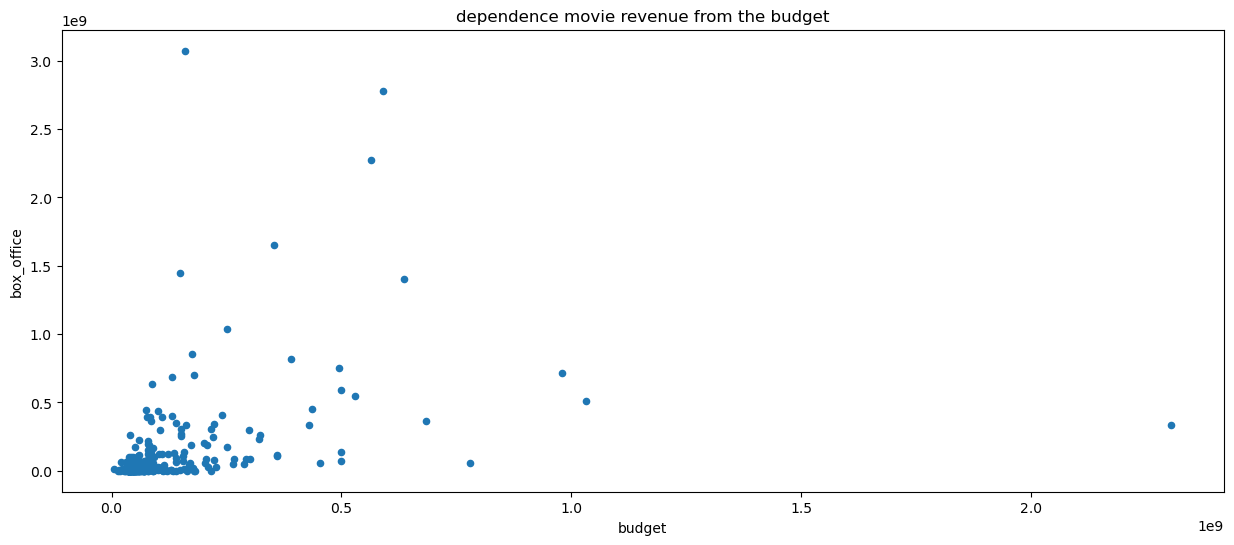

In [125]:
mkrf_fun.plot(kind='scatter',x='budget',y='box_office', 
              title='dependence movie revenue from the budget', figsize=(15,6));

In [126]:
mkrf_fun['budget'].corr(mkrf_fun['box_office'])

0.3805145631780698

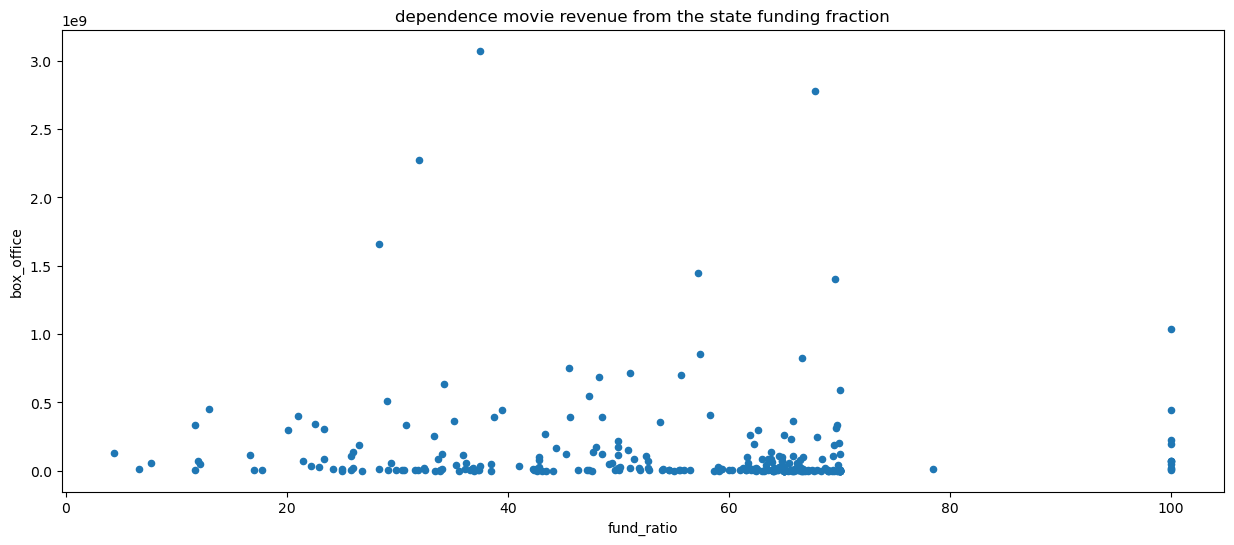

In [127]:
mkrf_fun.plot(kind='scatter',x='fund_ratio',y='box_office',
              title='dependence movie revenue from the state funding fraction', figsize=(15,6));

In [128]:
mkrf_fun['fund_ratio'].corr(mkrf_fun['box_office'])

-0.07535242655532155

In [129]:
d_corr=[]
count=0
for i in range(10,80,10):
    corr = mkrf_new.loc[mkrf_new['fund_ratio'] > 
                        i]['fund_ratio'].corr(mkrf_new.loc[mkrf_new['fund_ratio'] > i]['box_office'])
    d_corr.append(corr)
np.corrcoef(d_corr, list(range(10,80,10)))[0,1]

0.921592182125661

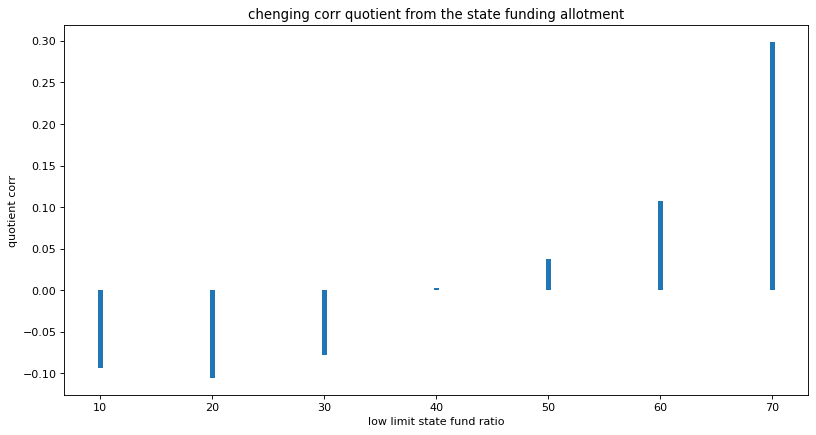

In [130]:
plt.figure(figsize=(12, 6), dpi=80)
y = d_corr
x = list(range(10,80,10))
plt.ylabel('quotient corr')
plt.xlabel('low limit state fund ratio')
plt.title('chenging corr quotient from the state funding allotment')
plt.bar(x, y, width = 0.4) 
plt.show()

In [131]:
d1_corr=[]
count=0
for i in range(10,80,10):
    corr = mkrf_new.loc[mkrf_new['fund_ratio'] > i]['budget'].corr(mkrf_new.loc[mkrf_new['fund_ratio'] > i]['box_office'])
    d1_corr.append(corr)
np.corrcoef(d1_corr, list(range(10,80,10)))[0,1]

0.9585743584297625

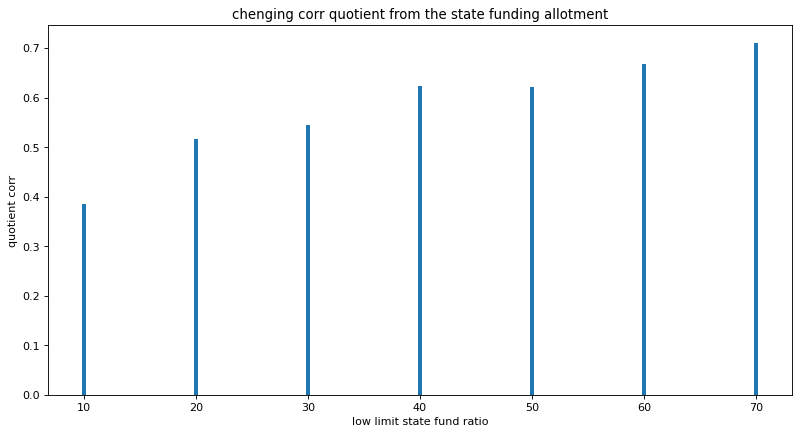

In [132]:
plt.figure(figsize=(12, 6), dpi=80)
y = d1_corr
x = list(range(10,80,10))
plt.ylabel('quotient corr')
plt.xlabel('low limit state fund ratio')
plt.title('chenging corr quotient from the state funding allotment')
plt.bar(x, y, width = 0.4) 
plt.show()

<div class="alert alert-info"> 
    Для выборки художественных фильмов с известным бюджетом определили, что между бюджетом картин и 
их сборами наблюдается слабая, но определенная положительная корреляция (корр = 0,38), что
является логичным. Также изучана зависимость между долей гос финансирования фильма ('fund_ratio')
и его сборами, которая показала очень низкую отрицательную корреляцию (корр = -0,075). 
    Было сделано предположение, что коэффициент корреляции между долей гос финансирования фильма и 
его сборами будет расти в выборках с увеличивающейся долей гос финансирования. Были определены 
коэф корреляции в выборках при ограничении нижнего порога доли гос финансирования от 10 до 80 %.
Установлено, что с повышением нижнего порода доли гос финансирования проспорциональнр 
увеличивается четкость зависимости между сборами и долей финансирования: для всей выборки 
(доля финансирования от 0 до 100 %) между сборами и долей очень слабая обратно-
пропорциональная связь, в интервале доли финансирования 40 - 100 % связи между сбоорами и 
долей финансирования нет, а с увеличением нижнего порога выборки от 40 до 80 % наблюдается 
довольно четкая пропорциональная связь между долей гос финансирования и сборами фильма. 
Аналогичным образом наблюдается увеличение степени пропорциональности связи между бюджетом
фильма и его сборами.
    Таким образом, положительная корреляция между долей гос финансирования и сборами фильма 
наблюдается только для фильмов, доля гос финансирования которых превышает 40 %. Если доля гос 
финансирования ниже 40 %, то, наоборот, сборы фильма растут с уменьшением доли гос финансирования. 
Для увеличения сборов от проката фильма долю гос финансирования целесообразно повышать, только если
вложения государства составляют не менее 40 %. Финансировать картины менее, чем на 40 % вообще 
нецелесообразно, лучше полностью отдать картину под контроль независимого продюсера. Это, очевидно, 
связано, что при средней доли гос финансирования размывается ответственность и творческий контроль 
над съемками, что ведет к падению сборов. При этом, рост бюджета фильма положительно сказывается на 
сборах, тем в большей степени, чем выше доля гос финансирования. То есть, для получения хороших 
сборов эффективность увеличения бюджета фильма тем выше, чем выше доля гос поддержки. Однако, данные 
наблюдения ничего не говорят об окупаемости фильма, ведь фильм с высокими сборами может провалиться
из-за большого бюджета.   
</b>

In [133]:
mkrf_new['ref_ratio'] = mkrf_new['nonrefundable_support']/(mkrf_new['nonrefundable_support']+
                                                           mkrf_new['refundable_support'])

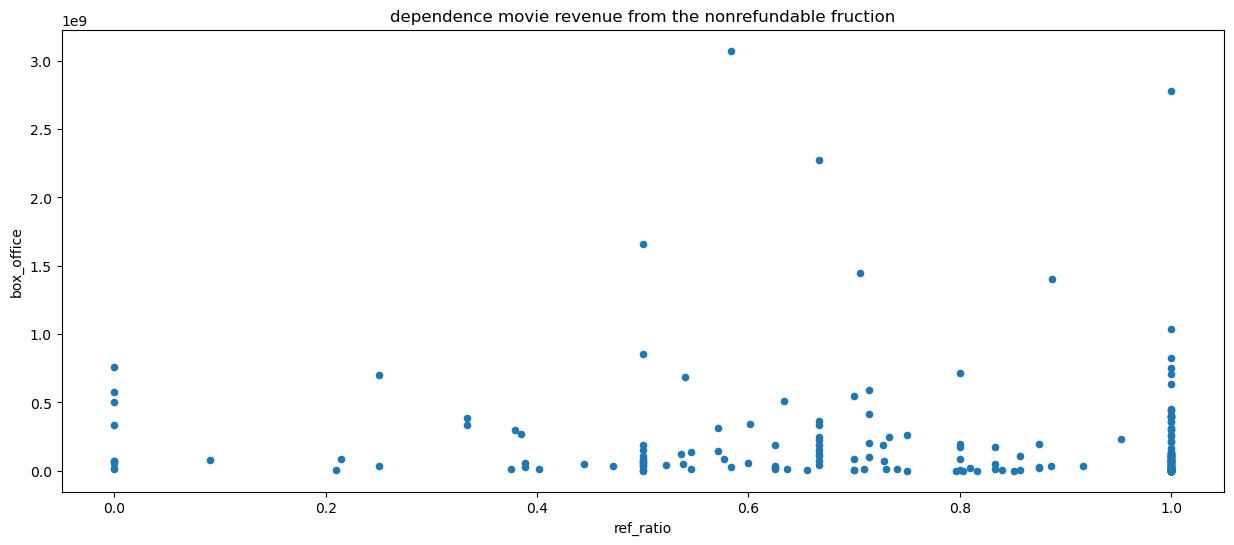

In [134]:
mkrf_new.plot(kind='scatter',x='ref_ratio',y='box_office', 
              title='dependence movie revenue from the nonrefundable fruction', figsize=(15,6));

In [135]:
mkrf_new['ref_ratio'].corr(mkrf_new['box_office'])

-0.19466721827422626

In [136]:
mkrf_new['ratings'].corr(mkrf_new['box_office'])

0.09391994800061987

In [137]:
mkrf_new['fund_ratio'].corr(mkrf_new['ratings'])

-0.04370468052046705

In [138]:
mkrf_new['ref_ratio'].corr(mkrf_new['ratings'])

0.13374312965096993

<div class="alert alert-info"> 
  Была найдена зависимость доли невозвратных средств в поддержке фильма от кассовых сборов, которая 
показала слабую, но отчетливую обратнопропорциональную зависимость (коэф корр = -0,19). То есть, 
увеличение доли невозвратных средств приводит к снижению сборов (что вероятно связано с качеством
фильма), так как снижается финансовый контроль. С другой стороны существует слабая пропорциональная 
зависимость между долей невозвратных средств и рейтингом фильмов (коэф корр = 0,13). В целом, 
величина гос финансирование очень слабо сказывается на рейтинге фильмов с небольшим креном в сторону 
снижения рейтинга (коэф корр = -0,04). То есть, с ростом  доли невозвратных средств коммерческая 
ценность фильма имеет тенденцию к снижению, но при этом симпатии зрителей растут. Это видимо связано
с тем, с тем что фильмы с высокой долей невозвратных средств имеют более авторский характер, в 
кинотеатрах собирают меньше, но потом становятся все более популярными в интернете.   
</b>

In [139]:
mkrf_new['payback'] = mkrf_new['box_office']*100/mkrf_new['budget']

In [140]:
mkrf_new['payback'].describe()

count     316.000000
mean       83.076723
std       169.183423
min         0.001703
25%         2.307405
50%        17.865508
75%        97.789555
max      1920.980432
Name: payback, dtype: float64

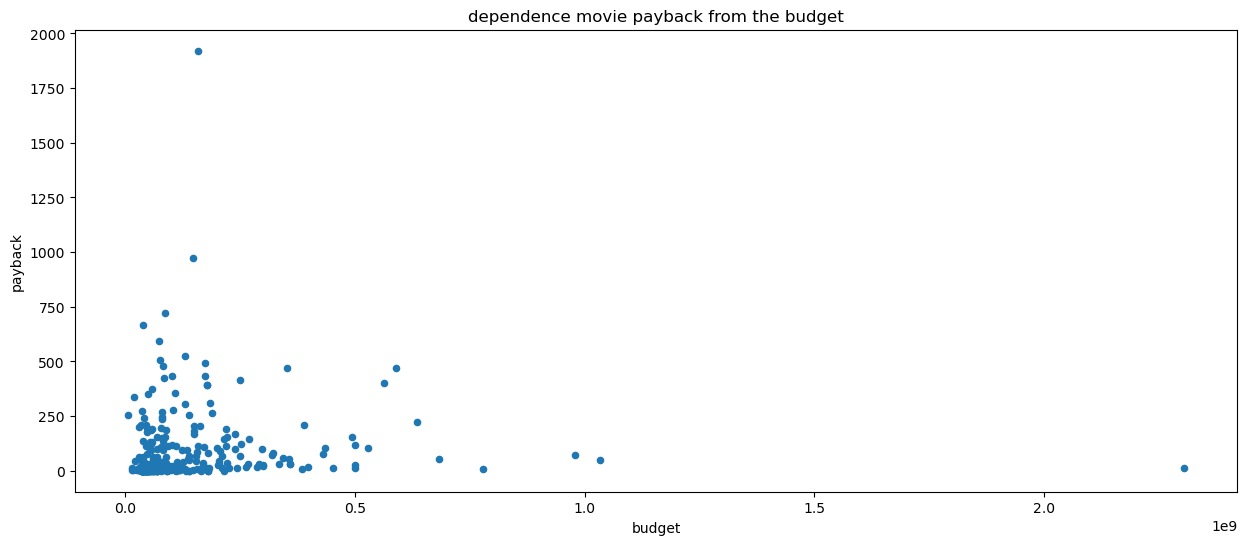

In [141]:
mkrf_new.plot(kind='scatter',x='budget',y='payback',
              title='dependence movie payback from the budget', figsize=(15,6));

In [142]:
mkrf_new['payback'].corr(mkrf_new['budget'])

0.07422729433983413

<Axes: title={'center': 'dependence movie payback from the funding'}, xlabel='fund_ratio', ylabel='payback'>

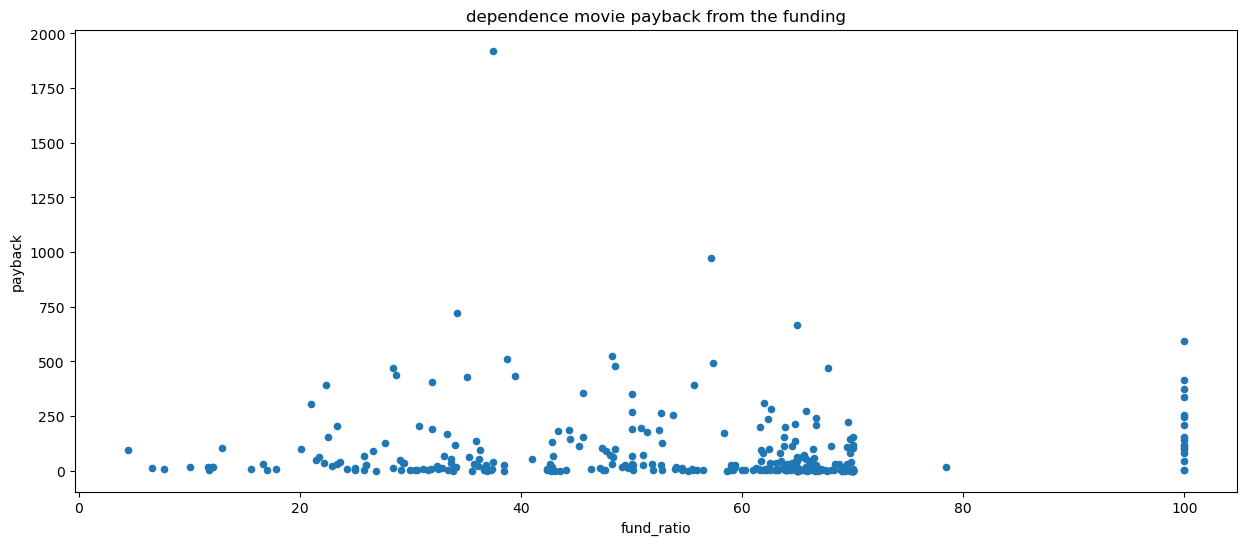

In [143]:
mkrf_new.plot(kind='scatter',x='fund_ratio',y='payback', title='dependence movie payback from the funding', figsize=(15,6))

In [144]:
mkrf_new['payback'].corr(mkrf_new['fund_ratio'])

-0.0028642414477382844

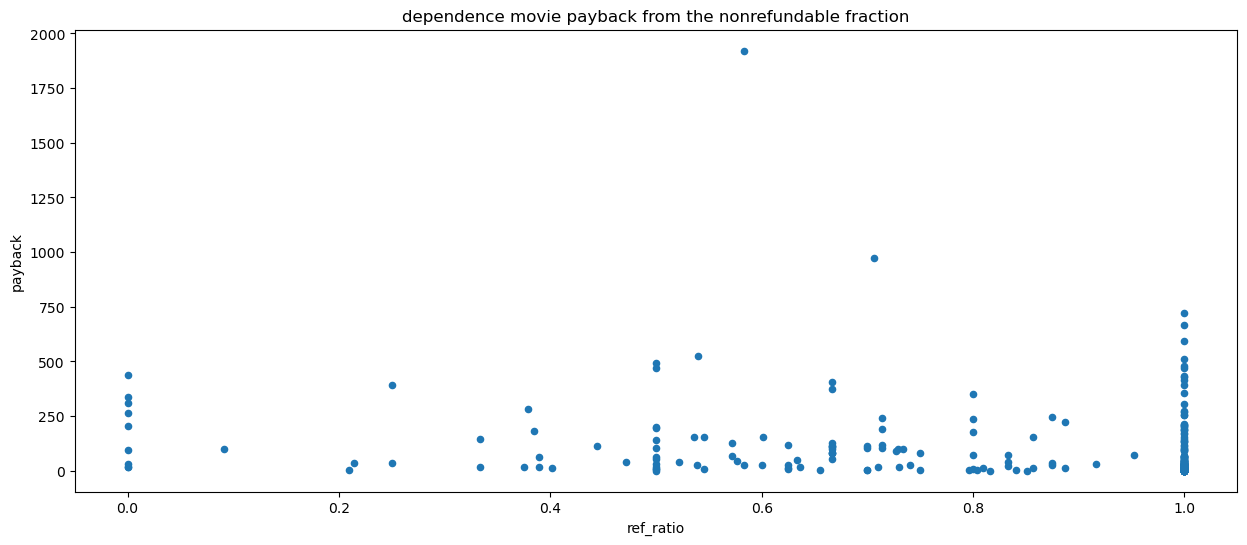

In [145]:
mkrf_new.plot(kind='scatter',x='ref_ratio',y='payback', 
              title='dependence movie payback from the nonrefundable fraction', figsize=(15,6));

In [146]:
mkrf_new['payback'].corr(mkrf_new['ref_ratio'])

-0.20725197025863218

In [147]:
mkrf_new['payback'].corr(mkrf_new['ratings'])

0.06861269347588196

<div class="alert alert-info"> 
  Был добавлен столбец окупаемости фильмов ('payback' в %), которая равна отношению величины сборов к
бюджету фильма. В целом, окупаемость бюджетных фильмов очень низкая: мединанная окупаемость 
составляет 17,9%, а более 75 % фильмов не окупились (Q3 = 97,8 %). Набор величин окупаемости
имеет большое станд отклонение (169 %), а среднее значение окупаемости (83 %) намного больше 
медианного. Это говорит о большом разбросе величин окупаемости - максимальная величина 
(1921 %) на 4 порядка больше минимальной (0 %). Окупаемость очень слабо растет с увеличением бюджета
фильма (коэф корр = 0,074) и и практически не зависит от величины доли гос финансирования 
(коэф корр = -0,002). В то же время, есть слабая, но отчетливая обратная связь между окупаемостью и 
долей невозвратных средств в финансировании фильма (коэф корр = -0,21), то есть коммерческий эффект 
от фильмов имеет тенденцию к понижению с увеличением доли невозвратного финансирования. Окупаемость 
фильмов также слабо, но пропорционально связана с их рейтингом (корр = 0,06), что довольно странно 
и может быть объяснено тем, что популярность к фильмам приходит через просмотры в интернете, а не
в кинотеатрах.      
</b>

### Общий вывод

<div class="alert alert-info"
    ### Подготовка данных.
     В процессе подготовки к анализу данных обе исходные таблицы были объединены методом merge(), по
столбцу "puNumber". Для этого данные столбца в 'mkrf_movies' были преобразованы в 'int64'. Затем в 
полученной таблице были исправлены типы данных в след столбцах: 'puNumber' (object на int64), 
'show_start_date' (object на datetime64), 'ratings' (object на float64).
   ## Работа с пропусками
     Были изучены и по возможности ликвидированы пропуски данных: один пропуск в 'production_country' 
был заменен на страну (Россия), которой принадлежит соответствующая студия; пропуски в 'director'
заменили соответствующим значением в столбце 'producer' и наоборот. Пропуски в данных о 
финансировании в столбцах 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source'
скорее всего связаны с фильмами зарубежного или совместного производства (или российского производства
без гос финансирования), так как количество этих пропусков одинаково во всех этих столбцах (7154). 
Доли пропусков в столбцах 'ratings' и 'genres' для картин с участием России и без нее примерно равны.
Пропуски в столбце 'box_office' для картин производства с российским участием составляют примерно 
25 % от общего числа. 
    ## Дубликаты данных
      Явных дубликатов в DF не обнаружено. При удалении столбца 'puNumber' было обнаружено только 5 
полных дубликатов, то есть релизы одного и того же фильма преподносятся со всеми атрибутами отдельного фильма со своими датами релиза, рейтингом и пр. Также, при определении сумм числовых параметров столбцов исходной и отфильтрованной таблиц было обнаружено несоответстве в суммарных данных, что говорит о том, что при удалении дубликатов были удалены некоторые численные характеристики отдельных релизов. Кроме того, нельзя исключать возможность, что в DF есть совершенно разные фильмы, имеющие одинаковое название. После удаления дубликатов строк по столбцу 'title' получили отфильтрованную таблицу mkrf_new, состоящую из неповторяющихся фильмов, которая может использоваться для анализа наряду с исходной таблицей mkrf_movies, содержащей информацию о всех релизах.
Ряд значения в столбцах категориальных переменных имеют лишние пробелы в ковычках, поэтому эти пробелы
были удаоены методом strip(), что снизило количество уникальных значений в столбцах. 
    ## Числовые столбцы
      Несоответствие в числовых столбцах 'refundable_support', 'nonrefundable_support' и 'budget' 
связано с тем, что ни в одной из строк нет равенства между суммой возвратных и невозвратных средств 
и величиной бюджета. При этом, в 17 случаях бюджет был меньше суммы возвр и невозвр средств - величина
бюджета была равна 0. Поэтому в этих 17 случаях величина бюджета (0) была заменена на сумму возвр и
невозвр средств. В остальных 315 случаях бюджет был больше суммы возвр и невозвр средств. При этом,
в 222 случаях это связано с тем, что в колонке возвр или колонке невозвр средств стояли нулевые 
значения. 
      В отдельные столбцы были выделены год релиза фильма, главный режиссер и основной жанр. 
В отдельном столбце 'fund_ratio' посчитана доля гос финансирования российских фильмов - средняя
величина доли финансовой поддержки (54,2 %) близка к медианной (61,5 %), поддержка может доходить 
до 100 %.
      В таблице релизов (mkfr_movies) в столбце 'box_office' 4328 пропусков (релизы, о прокате 
которых нет сведений). Доля релизов с известной информацией о прокате вкинотеатрах составляет 42,2 %. 
Аналогичный расчет для отфильтрованной таблицы, исключающей дубликаты релизов (mkrf_new), показывает
близкую долю релизов с известной информацией о прокате - 44,5 %. 
    ## Закономерности сборов фильмов
      Наиибольшие суммарные сборы были в 2017 г. Три года (2017 - 2019) ежегодные собры держались 
примерно на одном уровне - около 50 млрд. Минимальная сумма сборов была в 2010 г - 2,4 млн. 
В целом за десятилетие ежегодная сумма сборов увеличилась более, чем в 20000 раз. Эта огромная 
разница в мизерных ежегодных сборах начала десятиления (2010 - 2014 гг) и максимальных сборах в
период 2016 - 2019 гг технически связана с минимальным количеством имеющихся в таблице сведений 
о кассе фильмов в начале десятилетия и соответствующим ростом информации о кассе фильмов к концу 
десятых годов.  
     Средние и медианные значения сборов фильмов коррелируют между собой, однако, в большинстве 
случаев отличаются на порядок. Это говорит об очень большом разборе значений сборов разных картин
в течение одного года. Такой характер зависимости связан вероя0тно с низким уровнем информации о 
сборах фильмов в начале десятилетия (2010 - 2014 гг), что не позволяет набрать для этих лет 
презентативную выборку сборов; в целом, к середине и концу десятилетия выходит все больше дорогих 
фильмов, которые хорошо выступают в прокате.
    ## Исследоавание возрастных екатегорий 
      Выявлено лидерство фильмов подростковых категорий 12+ и 16+, что объясняется максимальным 
охватом потенциальных зрителей, они соответствуют большинству жанров. От подростковых фильмов 
отстают фильмы взрослой категории 18+ (39 млрд сборов), не смотря на их относительно высокую 
медианную прибыль (5,1 млн) и больщое количество таких фильмов (837). Доход от взрослых фильмов 
существенно ограничивает отсутствие подростковой аудитории, поэтому они имеют относительно низкую 
среднюю прибыль (46 млн), тогда как средняя прибыль, например, категории 12+ составляет 116 млн. 
Самые низкие сборы имеют фильмы 0+ (1,1 млрд), так как эту категорию не посещают подростки и 
большинство взрослых. Количество таких фильмов также минимальное (225), а медианная (0,095 млн) и 
средняя (4,8 млн) прибыли также минимальны из всех возрастных категорий. Сборы фильмов категории
12+ были ровными в период 2015 - 2019 гг, немного просели в 2017 г, но быстро восстановились. 
В категории 16+ сборы росли, достигнув максимума в 2016 г, а затем симметрично снижались до 2019 г. 
Сборы категории 18+ стабильно росли в рассматриваемый период наблюдений. Сборы фильмов 6+ из года в 
год менялись мало и демонстрировали наибольшую стабильность из всех категорий. Ежегодня динамика
изменения соотношения между сборами фильмов разных возрастных категорий в разные годы выглядит так: 
восходящая кривая сборов при переходе от 0+ к 12+, выход на плато в интервале 12+ - 16+, затем 
снижение к категории 18+ и снова небольшой рост при переходе к 6+. Исключение составляют 2017 г, 
когда наибольшие доходы пришлись от фильмов 16+ и 2015 г, когда фильмы этой же категории 16+ 
провалились. 
   ## Выявление роли гос поддержки бюджетных фильмов
       Доля фильмов с гос бюджетированием за весь период наблюдений составляет менее 5 %, но их доля
в общих кассовых сборах равна 18,4 %. В отдельную выборку выделели фильмы типа 'Художественный' 
(на них приходится 90 % от общего количества бюджетных фильмов), для которых известны сборы.
Доля бюджетных фильмов и доля в общих сборах этих фильмов выросли в итоге, соответственно, 
до 11,9% и 19,8 %. Дальнейшая выборка по наиболее популярных возрастных категориях 12+ и 16+ не 
дает дает определенности: для категории 12+ доля бюджетных фильмов 21,7%, а доля доходов от их 
проката 33,5%. В категории 16+ наблюдается некоторый баланс - доля бюджетных фильмов 12,6%, а доля
доходов от них 11 %. То есть, по имеющимся данным бюджетные фильмы фильмы с точки зрения сборов
выступили, в целом, лучше небюджетных в кассовом отношении, но это не является объективным выводом,
так как для более 50 % небюджетных фильмов касса не известна. Кроме того, только для бюджетных 
фильмов известен их бюджет, поэтому по выявленным данным нельзя судить о сравнительной рентабельности 
бюджетных и прочих картин.
     ## Связь между сборами фильма и долей невозвратных средств
     Установлено, что оложительная корреляция между долей гос финансирования и сборами фильма 
наблюдается только для фильмов, доля гос финансирования которых превышает 40 %. Если доля гос 
финансирования ниже 40 %, то, наоборот, сборы фильма растут с уменьшением доли гос финансирования. 
Для увеличения сборов от проката фильма долю гос финансирования целесообразно повышать, только 
если вложения государства составляют не менее 40 %. Финансировать картины менее, чем на 40 % вообще 
нецелесообразно, лучше полностью отдать картину под контроль независимого продюсера. Это, очевидно, 
связано, что при средней доли гос финансирования размывается ответственность и творческий контроль 
над съемками, что ведет к падению сборов. При этом, рост бюджета фильма положительно сказывается на 
сборах, тем в большей степени, чем выше доля гос финансирования. То есть, для получения хороших 
сборов эффективность увеличения бюджета фильма тем выше, чем выше доля гос поддержки. Однако, данные
наблюдения ничего не говорят об окупаемости фильма, ведь фильм с высокими сборами может провалиться 
из-за большого бюджета.
     Выявлено, что увеличение доли невозвратных средств приводит к снижению сборов (что вероятно 
связано с качеством фильма), так как снижается финансовый контроль. С другой стороны существует 
слабая пропорциональная зависимость между долей невозвратных средств и рейтингом фильмов 
(коэф корр = 0,13). В целом, величина гос финансирование очень слабо сказывается на рейтинге фильмов
с небольшим креном в сторону снижения рейтинга. То есть, с ростом  доли невозвратных средств 
коммерческая ценность фильма имеет тенденцию к снижению, но при этом симпатии зрителей растут. 
Это видимо связано с тем, с тем что фильмы с высокой долей невозвратных средств имеют более авторский
характер, в кинотеатрах собирают меньше, но потом становятся все более популярными в интернете.
    ## Особенности окупаемости бюджетных фильмов
     Окупаемость (рентабельность) бюджетных очень слабо растет с увеличением бюджета фильма и 
практически не зависит от величины доли гос финансирования. В то же время, есть слабая, но 
отчетливая обратная связь между окупаемостью и долей невозвратных средств в финансировании 
фильма, то есть коммерческий эффект от фильмов имеет тенденцию к понижению с увеличением доли
невозвратного финансирования. Окупаемость фильмов также слабо, но пропорционально связана с 
их рейтингом, что довольно странно и может быть объяснено тем, что популярность к фильмам 
приходит через просмотры в интернете, а не в кинотеатрах.      
  
</b>   

<div class="alert alert-info"> 
 
 <b>Подготовка данных</b>         
    В процессе подготовки к анализу данных обе исходные таблицы были объединены методом merge(), 
по столбцу "puNumber". Для этого данные столбца в 'mkrf_movies' были преобразованы в 'int64'. Затем в 
полученной таблице были исправлены типы данных в след столбцах: 'puNumber' (object на int64), 'ratings' 
(object на float64).  
  <b>Работа с пропусками</b>    
     Были изучены и по возможности ликвидированы пропуски данных: один пропуск в 'production_country' 
был заменен на страну (Россия), которой принадлежит соответствующая студия; пропуски в 'director'
заменили соответствующим значением в столбце 'producer' и наоборот. Пропуски в данных о 
финансировании в столбцах 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source'
скорее всего связаны с фильмами зарубежного или совместного производства (или российского производства
без гос финансирования), так как количество этих пропусков одинаково во всех этих столбцах (7154). 
Доли пропусков в столбцах 'ratings' и 'genres' для картин с участием России и без нее примерно равны.
Пропуски в столбце 'box_office' для картин производства с российским участием составляют примерно 
25 % от общего числа.

  <b>Дубликаты данных</b>                 
      Явных дубликатов в DF не обнаружено. При удалении столбца 'puNumber' было обнаружено только 5 
полных дубликатов, то есть релизы одного и того же фильма преподносятся со всеми атрибутами отдельного фильма со своими датами релиза, рейтингом и пр. Также, при определении сумм числовых параметров столбцов исходной и отфильтрованной таблиц было обнаружено несоответстве в суммарных данных, что говорит о том, что при удалении дубликатов были удалены некоторые численные характеристики отдельных релизов. Кроме того, нельзя исключать возможность, что в DF есть совершенно разные фильмы, имеющие одинаковое название. После удаления дубликатов строк по столбцу 'title' получили отфильтрованную таблицу mkrf_new, состоящую из неповторяющихся фильмов, которая может использоваться для анализа наряду с исходной таблицей mkrf_movies, содержащей информацию о всех релизах.
Ряд значения в столбцах категориальных переменных имеют лишние пробелы в ковычках, поэтому эти пробелы
были удаоены методом strip(), что снизило количество уникальных значений в столбцах. 

   <b>Числовые столбцы</b>    
      Несоответствие в числовых столбцах 'refundable_support', 'nonrefundable_support' и 'budget' 
связано с тем, что ни в одной из строк нет равенства между суммой возвратных и невозвратных средств 
и величиной бюджета. При этом, в 17 случаях бюджет был меньше суммы возвр и невозвр средств - величина
бюджета была равна 0. Поэтому в этих 17 случаях величина бюджета (0) была заменена на сумму возвр и
невозвр средств. В остальных 315 случаях бюджет был больше суммы возвр и невозвр средств. При этом,
в 222 случаях это связано с тем, что в колонке возвр или колонке невозвр средств стояли нулевые 
значения. 
      В отдельные столбцы были выделены год релиза фильма, главный режиссер и основной жанр. 
В отдельном столбце 'fund_ratio' посчитана доля гос финансирования российских фильмов - средняя
величина доли финансовой поддержки (54,2 %) близка к медианной (61,5 %), поддержка может доходить 
до 100 %.
      В таблице релизов (mkfr_movies) в столбце 'box_office' 4328 пропусков (релизы, о прокате 
которых нет сведений). Доля релизов с известной информацией о прокате вкинотеатрах составляет 42,2 %. 
Аналогичный расчет для отфильтрованной таблицы, исключающей дубликаты релизов (mkrf_new), показывает
близкую долю релизов с известной информацией о прокате - 44,5 %.
   <b>Закономерности сборов фильмов</b> 
       Наибольшие суммарные сборы были в 2017 г. Три года (2017 - 2019) ежегодные собры держались 
примерно на одном уровне - около 50 млрд. Минимальная сумма сборов была в 2010 г - 2,4 млн. 
В целом за десятилетие ежегодная сумма сборов увеличилась более, чем в 20000 раз. Эта огромная 
разница в мизерных ежегодных сборах начала десятиления (2010 - 2014 гг) и максимальных сборах в
период 2016 - 2019 гг технически связана с минимальным количеством имеющихся в таблице сведений 
о кассе фильмов в начале десятилетия и соответствующим ростом информации о кассе фильмов к концу 
десятых годов.  
     Средние и медианные значения сборов фильмов коррелируют между собой, однако, в большинстве 
случаев отличаются на порядок. Это говорит об очень большом разборе значений сборов разных картин
в течение одного года. Такой характер зависимости связан вероя0тно с низким уровнем информации о 
сборах фильмов в начале десятилетия (2010 - 2014 гг), что не позволяет набрать для этих лет 
презентативную выборку сборов; в целом, к середине и концу десятилетия выходит все больше дорогих 
фильмов, которые хорошо выступают в прокате.
    <b>Исследоавание возрастных екатегорий</b>   
      Выявлено лидерство фильмов подростковых категорий 12+ и 16+, что объясняется максимальным 
охватом потенциальных зрителей, они соответствуют большинству жанров. От подростковых фильмов 
отстают фильмы взрослой категории 18+ (39 млрд сборов), не смотря на их относительно высокую 
медианную прибыль (5,1 млн) и больщое количество таких фильмов (837). Доход от взрослых фильмов 
существенно ограничивает отсутствие подростковой аудитории, поэтому они имеют относительно низкую 
среднюю прибыль (46 млн), тогда как средняя прибыль, например, категории 12+ составляет 116 млн. 
Самые низкие сборы имеют фильмы 0+ (1,1 млрд), так как эту категорию не посещают подростки и 
большинство взрослых. Количество таких фильмов также минимальное (225), а медианная (0,095 млн) и 
средняя (4,8 млн) прибыли также минимальны из всех возрастных категорий. Сборы фильмов категории
12+ были ровными в период 2015 - 2019 гг, немного просели в 2017 г, но быстро восстановились. 
В категории 16+ сборы росли, достигнув максимума в 2016 г, а затем симметрично снижались до 2019 г. 
Сборы категории 18+ стабильно росли в рассматриваемый период наблюдений. Сборы фильмов 6+ из года в 
год менялись мало и демонстрировали наибольшую стабильность из всех категорий. Ежегодня динамика
изменения соотношения между сборами фильмов разных возрастных категорий в разные годы выглядит так: 
восходящая кривая сборов при переходе от 0+ к 12+, выход на плато в интервале 12+ - 16+, затем 
снижение к категории 18+ и снова небольшой рост при переходе к 6+. Исключение составляют 2017 г, 
когда наибольшие доходы пришлись от фильмов 16+ и 2015 г, когда фильмы этой же категории 16+ 
провалились. 


<b>Выявление роли гос поддержки бюджетных фильмов</b>                                                
           Доля фильмов с гос бюджетированием за весь период наблюдений составляет менее 5 %, но их доля
в общих кассовых сборах равна 18,4 %. В отдельную выборку выделели фильмы типа 'Художественный' 
(на них приходится 90 % от общего количества бюджетных фильмов), для которых известны сборы.
Доля бюджетных фильмов и доля в общих сборах этих фильмов выросли в итоге, соответственно, 
до 11,9% и 19,8 %. Дальнейшая выборка по наиболее популярных возрастных категориях 12+ и 16+ не 
дает дает определенности: для категории 12+ доля бюджетных фильмов 21,7%, а доля доходов от их 
проката 33,5%. В категории 16+ наблюдается некоторый баланс - доля бюджетных фильмов 12,6%, а доля
доходов от них 11 %. То есть, по имеющимся данным бюджетные фильмы фильмы с точки зрения сборов
выступили, в целом, лучше небюджетных в кассовом отношении, но это не является объективным выводом,
так как для более 50 % небюджетных фильмов касса не известна. Кроме того, только для бюджетных 
фильмов известен их бюджет, поэтому по выявленным данным нельзя судить о сравнительной рентабельности 
бюджетных и прочих картин.                                                                                                                                                       
    <b>Связь между сборами фильма и долей невозвратных средств</b>                                                                        
       Установлено, что оложительная корреляция между долей гос финансирования и сборами фильма 
наблюдается только для фильмов, доля гос финансирования которых превышает 40 %. Если доля гос 
финансирования ниже 40 %, то, наоборот, сборы фильма растут с уменьшением доли гос финансирования. 
Для увеличения сборов от проката фильма долю гос финансирования целесообразно повышать, только 
если вложения государства составляют не менее 40 %. Финансировать картины менее, чем на 40 % вообще 
нецелесообразно, лучше полностью отдать картину под контроль независимого продюсера. Это, очевидно, 
связано, что при средней доли гос финансирования размывается ответственность и творческий контроль 
над съемками, что ведет к падению сборов. При этом, рост бюджета фильма положительно сказывается на 
сборах, тем в большей степени, чем выше доля гос финансирования. То есть, для получения хороших 
сборов эффективность увеличения бюджета фильма тем выше, чем выше доля гос поддержки. Однако, данные
наблюдения ничего не говорят об окупаемости фильма, ведь фильм с высокими сборами может провалиться 
из-за большого бюджета.
     Выявлено, что увеличение доли невозвратных средств приводит к снижению сборов (что вероятно 
связано с качеством фильма), так как снижается финансовый контроль. С другой стороны существует 
слабая пропорциональная зависимость между долей невозвратных средств и рейтингом фильмов 
(коэф корр = 0,13). В целом, величина гос финансирование очень слабо сказывается на рейтинге фильмов
с небольшим креном в сторону снижения рейтинга. То есть, с ростом  доли невозвратных средств 
коммерческая ценность фильма имеет тенденцию к снижению, но при этом симпатии зрителей растут. 
Это видимо связано с тем, с тем что фильмы с высокой долей невозвратных средств имеют более авторский
характер, в кинотеатрах собирают меньше, но потом становятся все более популярными в интернете.
    <b>Особенности окупаемости бюджетных фильмов</b>  
     Окупаемость (рентабельность) бюджетных очень слабо растет с увеличением бюджета фильма и 
практически не зависит от величины доли гос финансирования. В то же время, есть слабая, но 
отчетливая обратная связь между окупаемостью и долей невозвратных средств в финансировании 
фильма, то есть коммерческий эффект от фильмов имеет тенденцию к понижению с увеличением доли
невозвратного финансирования. Окупаемость фильмов также слабо, но пропорционально связана с 
их рейтингом, что довольно странно и может быть объяснено тем, что популярность к фильмам 
приходит через просмотры в интернете, а не в кинотеатрах.      
</div>